### Importing necessary libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sweetviz as sv
import warnings
from datetime import datetime
import scipy
from scipy.stats import chi2_contingency

from sklearn.preprocessing import OrdinalEncoder
from typing import Callable, List
from plotly.subplots import make_subplots
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)

## Data Cleaning and Exploratory Data Analysis
### Reading the Dataset

In [2]:
#Reading the csv file....
df = pd.read_csv('BDP_Dataset.csv')
df.columns = df.columns.str.replace(' ','_')
df.drop('No.', axis='columns', inplace=True)
df.head(10)

,CGPA_Class,Gender,V1-1_(1),Time_Day_Watched_(V1-1),Student_Rating_(V1-1),V1-2_(1),Time_Day_Watched_(V1-2),Student_Rating_(V1-2),V1-3_(1),Time_Day_Watched_(V1-3),Student_Rating_(V1-3),V1-4_(1),Time_Day_Watched_(V1-4),Student_Rating_(V1-4),V1_PercentWatched,V2-1_(2),Time_Day_Watched_(V2-1),Student_Rating_(V2-1),V2-2_(2),Time_Day_Watched_(V2-2),Student_Rating_(V2-2),V2-3_(2),Time_Day_Watched_(V2-3),Student_Rating_(V2-3),V2-4_(2),Time_Day_Watched_(V2-4),Student_Rating_(V2-4),V2_PercentWatched,V3-1_(3),Time_Day_Watched_(V3-1),Student_Rating_(V3-1),V3-2_(3),Time_Day_Watched_(V3-2),Student_Rating_(V3-2),V3-3_(3),Time_Day_Watched_(V3-3),Student_Rating_(V3-3),V3-4_(3),Time_Day_Watched_(V3-4),Student_Rating_(V3-4),V3_PercentWatched,A/R_Score,Active,Reflective,S/I_Score,Sensing,Intuitive,Vi/Vb_Score,Visual,Verbal,S/G_Score,Sequential,Global,Quiz
0,2.67 - 3.32,Male,6,2/2/2021 22:58,Excellent,50.0,2/2/2021 23:03,Satisfactory,22.0,2/2/2021 23:05,Very Good,5,2/2/2021 23:06,Very Good,100.0,13,2/2/2021 23:11,Very Good,35.0,2/2/2021 23:19,Satisfactory,12.0,2/2/2021 23:20,Very Good,7.0,2/2/2021 23:21,Very Good,100.000000,9.0,2/2/2021 23:40,Excellent,4.0,2/2/2021 23:52,Very Good,13.0,2/2/2021 23:55,Very Good,5.0,2/2/2021 23:56,Very Good,100.000000,3,1,0,3,1,0,7,1,0,1,1,0,10
1,2.67 - 3.32,Male,6,2/3/2021 0:07,Very Good,50.0,2/3/2021 19:07,Very Good,22.0,2/3/2021 19:09,Very Good,5,2/3/2021 19:10,Very Good,100.0,13,2/3/2021 19:12,Very Good,35.0,2/3/2021 19:19,Very Good,12.0,2/3/2021 19:20,Very Good,7.0,2/3/2021 19:13,Very Good,100.000000,10.0,2/3/2021 19:32,Very Good,4.0,2/3/2021 19:23,Very Good,13.0,2/3/2021 19:34,Very Good,5.0,2/3/2021 19:24,Very Good,103.225807,3,0,1,9,1,0,7,1,0,3,0,1,8
2,2.67 - 3.32,Male,6,2/1/2021 21:48,Excellent,50.0,2/1/2021 23:45,Satisfactory,22.0,2/1/2021 18:39,Very Good,5,2/1/2021 18:22,Satisfactory,100.0,13,2/1/2021 23:29,Very Good,35.0,2/2/2021 19:04,Satisfactory,12.0,2/1/2021 18:28,Very Good,7.0,2/1/2021 18:23,Excellent,100.000000,9.0,2/2/2021 20:33,Excellent,4.0,2/2/2021 21:10,Very Good,13.0,2/1/2021 18:29,Very Good,5.0,2/1/2021 18:17,Very Good,100.000000,1,0,1,7,1,0,7,1,0,3,0,1,6
3,3.67 - 4.00,Male,6,1/31/21 0:08,Excellent,50.0,1/31/21 0:32,Very Good,22.0,1/31/21 0:42,Excellent,5,1/30/21 15:24,Excellent,100.0,15,1/31/21 0:48,Excellent,60.0,1/31/21 1:16,Excellent,12.0,1/31/21 0:51,Very Good,7.0,1/31/21 0:50,Excellent,140.298507,9.0,1/31/21 1:21,Excellent,4.0,1/31/21 0:14,Excellent,13.0,1/31/21 0:17,Very Good,5.0,1/31/21 0:15,Excellent,100.000000,3,0,1,3,1,0,7,1,0,1,1,0,5
4,2.67 - 3.32,Male,6,2/3/2021 17:00,Very Good,50.0,2/3/2021 16:38,Very Good,22.0,1/29/21 13:40,Satisfactory,5,1/29/21 14:21,Very Good,100.0,13,2/3/2021 15:27,Excellent,35.0,2/3/2021 17:40,Very Good,12.0,1/29/21 14:02,Very Good,7.0,1/29/21 14:45,Satisfactory,100.000000,9.0,2/3/2021 14:49,Very Good,4.0,2/3/2021 14:22,Very Good,13.0,1/29/21 15:18,Excellent,5.0,1/29/21 14:58,Very Good,100.000000,3,1,0,1,1,0,5,1,0,3,0,1,8
5,3.33 - 3.66,Female,6,2/1/2021 14:00,Excellent,50.0,1/31/21 17:38,Fair,22.0,1/31/21 16:31,Fair,5,1/31/21 16:39,Fair,100.0,13,2/1/2021 13:37,Satisfactory,35.0,2/1/2021 12:54,Fair,12.0,2/1/2021 13:07,Fair,7.0,2/1/2021 13:18,Fair,100.000000,10.0,2/7/2021 13:15,Excellent,4.0,2/7/2021 13:17,Satisfactory,13.0,2/1/2021 14:13,Satisfactory,5.0,2/1/2021 14:43,Satisfactory,103.225807,3,0,1,3,1,0,3,1,0,5,0,1,8
6,3.67 - 4.00,Male,6,2/3/2021 10:36,Excellent,50.0,2/3/2021 12:21,Very Good,22.0,2/3/2021 10:31,Excellent,5,2/3/2021 9:59,Very Good,100.0,13,2/3/2021 10:43,Satisfactory,35.0,2/3/2021 12:13,Excellent,12.0,2/3/2021 10:25,Very Good,7.0,2/3/2021 10:19,Satisfactory,100.000000,9.0,2/3/2021 10:39,Excellent,4.0,2/3/2021 10:30,Very Good,13.0,2/3/2021 10:27,Excellent,5.0,2/3/2021 10:19,Very Good,100.000000,7,0,1,1,0,1,7,1,0,7,0,1,2
7,2.67 - 3.32,Male,6,2/1/2021 19:05,Very Good,50.0,2/1/2021 20:02,Very Good,22.0,2/1/2021 20:37,Very Good,5,2/1/2021 20:48,Very Good,100.0,13,2/1/2021 21:12,Very Good,35.0,2/1/2021 21:51,Excellent,12.0,2/1/2021 22:03,Very Goo

## Identifying number of unique data for each column

In [3]:
df.nunique()

CGPA_Class                   4
Gender                       2
V1-1_(1)                     9
Time_Day_Watched_(V1-1)    109
Student_Rating_(V1-1)        5
V1-2_(1)                    10
Time_Day_Watched_(V1-2)    100
Student_Rating_(V1-2)        5
V1-3_(1)                     8
Time_Day_Watched_(V1-3)    105
Student_Rating_(V1-3)        5
V1-4_(1)                     5
Time_Day_Watched_(V1-4)    106
Student_Rating_(V1-4)        5
V1_PercentWatched           27
V2-1_(2)                     7
Time_Day_Watched_(V2-1)    108
Student_Rating_(V2-1)        5
V2-2_(2)                     9
Time_Day_Watched_(V2-2)    101
Student_Rating_(V2-2)        5
V2-3_(2)                    12
Time_Day_Watched_(V2-3)    107
Student_Rating_(V2-3)        5
V2-4_(2)                     8
Time_Day_Watched_(V2-4)    107
Student_Rating_(V2-4)        5
V2_PercentWatched           27
V3-1_(3)                    17
Time_Day_Watched_(V3-1)    106
Student_Rating_(V3-1)        5
V3-2_(3)                     8
Time_Day

## Dataset consists of `113` Rows and `54` columns
+ 26 categorical features
+ 16 integer features
+ 9 floating features

In [4]:
# check dimensionality...
print("Number of rows:", df.shape[0])
print("Number of columns:",df.shape[1])
#check datatype
df.dtypes.value_counts()

Number of rows: 113
Number of columns: 54


object     26
int64      16
float64    12
dtype: int64

In [5]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  28
Number of Categorical features:  26


In [6]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['V1-1_(1)', 'V1-2_(1)', 'V1-3_(1)', 'V1-4_(1)', 'V1_PercentWatched',
       'V2-1_(2)', 'V2-2_(2)', 'V2-3_(2)', 'V2-4_(2)', 'V2_PercentWatched',
       'V3-1_(3)', 'V3-2_(3)', 'V3-3_(3)', 'V3-4_(3)', 'V3_PercentWatched',
       'A/R_Score', 'Active', 'Reflective', 'S/I_Score', 'Sensing',
       'Intuitive', 'Vi/Vb_Score', 'Visual', 'Verbal', 'S/G_Score',
       'Sequential', 'Global', 'Quiz'],
      dtype='object')
****************************************************************************************************
Index(['CGPA_Class', 'Gender', 'Time_Day_Watched_(V1-1)',
       'Student_Rating_(V1-1)', 'Time_Day_Watched_(V1-2)',
       'Student_Rating_(V1-2)', 'Time_Day_Watched_(V1-3)',
       'Student_Rating_(V1-3)', 'Time_Day_Watched_(V1-4)',
       'Student_Rating_(V1-4)', 'Time_Day_Watched_(V2-1)',
       'Student_Rating_(V2-1)', 'Time_Day_Watched_(V2-2)',
       'Student_Rating_(V2-2)', 'Time_Day_Watched_(V2-3)',
       'Student_Rating_(V2-3)', 'Time_Day_Watched_(V2-4)',
  

## Describing the dataset

In [7]:
df.describe()

,V1-1_(1),V1-2_(1),V1-3_(1),V1-4_(1),V1_PercentWatched,V2-1_(2),V2-2_(2),V2-3_(2),V2-4_(2),V2_PercentWatched,V3-1_(3),V3-2_(3),V3-3_(3),V3-4_(3),V3_PercentWatched,A/R_Score,Active,Reflective,S/I_Score,Sensing,Intuitive,Vi/Vb_Score,Visual,Verbal,S/G_Score,Sequential,Global,Quiz
count,113.00000,109.000000,112.000000,113.000000,113.000000,113.000000,109.000000,112.000000,113.000000,113.000000,111.000000,113.000000,112.000000,112.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,6.20354,45.614679,22.330357,4.858407,93.005651,13.407080,35.045872,12.357143,6.870885,99.001585,10.567568,4.196726,12.580357,4.978482,103.163574,3.495575,0.469027,0.530973,4.380531,0.743363,0.256637,5.920354,0.876106,0.123894,2.787611,0.504425,0.495575,7.911504
std,1.55930,14.111926,5.356462,1.163947,24.487393,2.740689,13.086879,4.060038,1.736027,27.002304,3.904826,1.308761,2.824087,1.264185,23.865032,2.556937,0.501263,0.501263,2.592291,0.438723,0.438723,3.162677,0.330928,0.330928,1.933960,0.502208,0.502208,1.780638
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,6.00000,50.000000,22.000000,5.000000,100.000000,13.000000,35.000000,12.000000,7.000000,100.000000,9.000000,4.000000,13.000000,5.000000,100.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,7.000000
50%,6.00000,50.000000,22.000000,5.000000,100.000000,13.000000,35.000000,12.000000,7.000000,100.000000,9.000000,4.000000,13.000000,5.000000,100.000000,3.000000,0.000000,1.000000,5.000000,1.000000,0.000000,7.000000,1.000000,0.000000,3.000000,1.000000,0.000000,8.000000
75%,6.00000,50.000000,22.000000,5.000000,101.204819,13.000000,35.000000,12.000000,7.000000,104.477612,11.000000,4.000000,13.000000,5.000000,109.677419,5.000000,1.000000,1.000000,7.000000,1.000000,1.000000,9.000000,1.000000,0.000000,3.000000,1.000000,1.000000,9.000000
max,13.00000,60.000000,45.000000,11.000000,133.734940,23.000000,120.000000,43.000000,13.000000,226.865672,27.000000,9.000000,20.000000,10.000000,158.064516,11.000000,1.000000,1.000000,9.000000,1.000000,1.000000,11.000000,1.000000,1.000000,11.000000,1.000000,1.000000,10.000000


## Examining data for any imbalance
#### Features seem to exhibit an uneven distribution

In [8]:
for i in range(0,len(df. columns)):
    print(df.iloc[:,[i]].value_counts())
    print("")
    print("--------------")

CGPA_Class 
2.67 - 3.32    52
3.67 - 4.00    32
3.33 - 3.66    25
2.00 - 2.66     4
dtype: int64

--------------
Gender
Male      101
Female     12
dtype: int64

--------------
V1-1_(1)
6           83
7           18
8            3
0            2
10           2
13           2
1            1
2            1
4            1
dtype: int64

--------------
Time_Day_Watched_(V1-1)
1/28/21 22:11              2
2/1/2021 16:18             2
1/28/21 18:19              1
9/4/2021 16:16             1
9/6/2021 7:46              1
                          ..
2/2/2021 1:35              1
2/2/2021 17:01             1
2/2/2021 16:54             1
2/2/2021 16:53             1
9/8/2021 9:34              1
Length: 109, dtype: int64

--------------
Student_Rating_(V1-1)
Excellent                50
Very Good                40
Satisfactory             21
Fair                      1
Poor (never watch it)     1
dtype: int64

--------------
V1-2_(1)
50.0        87
0.0          6
55.0         5
60.0         3
20.0 

### Identyfying the datatypes of each column

In [9]:
#Identidying collumn attributes...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CGPA_Class               113 non-null    object 
 1   Gender                   113 non-null    object 
 2   V1-1_(1)                 113 non-null    int64  
 3   Time_Day_Watched_(V1-1)  111 non-null    object 
 4   Student_Rating_(V1-1)    113 non-null    object 
 5   V1-2_(1)                 109 non-null    float64
 6   Time_Day_Watched_(V1-2)  103 non-null    object 
 7   Student_Rating_(V1-2)    113 non-null    object 
 8   V1-3_(1)                 112 non-null    float64
 9   Time_Day_Watched_(V1-3)  109 non-null    object 
 10  Student_Rating_(V1-3)    113 non-null    object 
 11  V1-4_(1)                 113 non-null    int64  
 12  Time_Day_Watched_(V1-4)  109 non-null    object 
 13  Student_Rating_(V1-4)    113 non-null    object 
 14  V1_PercentWatched        1

## Identifying the number of empty values for each column
### Data set seems to have lots of empty values especially for `Time_Day_Watched_(V1-2)`

In [10]:
df.isnull().sum()

CGPA_Class                  0
Gender                      0
V1-1_(1)                    0
Time_Day_Watched_(V1-1)     2
Student_Rating_(V1-1)       0
V1-2_(1)                    4
Time_Day_Watched_(V1-2)    10
Student_Rating_(V1-2)       0
V1-3_(1)                    1
Time_Day_Watched_(V1-3)     4
Student_Rating_(V1-3)       0
V1-4_(1)                    0
Time_Day_Watched_(V1-4)     4
Student_Rating_(V1-4)       0
V1_PercentWatched           0
V2-1_(2)                    0
Time_Day_Watched_(V2-1)     2
Student_Rating_(V2-1)       0
V2-2_(2)                    4
Time_Day_Watched_(V2-2)     9
Student_Rating_(V2-2)       0
V2-3_(2)                    1
Time_Day_Watched_(V2-3)     3
Student_Rating_(V2-3)       0
V2-4_(2)                    0
Time_Day_Watched_(V2-4)     4
Student_Rating_(V2-4)       0
V2_PercentWatched           0
V3-1_(3)                    2
Time_Day_Watched_(V3-1)     5
Student_Rating_(V3-1)       0
V3-2_(3)                    0
Time_Day_Watched_(V3-2)     3
Student_Ra

### Heatmap for visual identification of missing values

<AxesSubplot:>

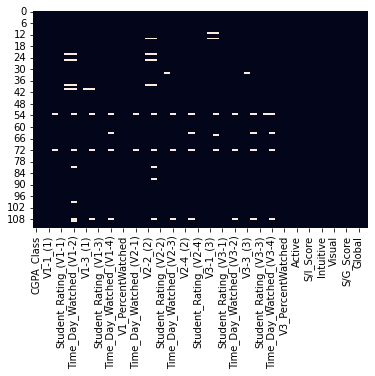

In [11]:
#Heatmap for visualising empty values in dataset
sns.heatmap(df.isnull(), cbar=False)

### Inspecting rows that have null values

In [12]:
##inspect rows with nan values
df[df.isna().any(axis=1)]

,CGPA_Class,Gender,V1-1_(1),Time_Day_Watched_(V1-1),Student_Rating_(V1-1),V1-2_(1),Time_Day_Watched_(V1-2),Student_Rating_(V1-2),V1-3_(1),Time_Day_Watched_(V1-3),Student_Rating_(V1-3),V1-4_(1),Time_Day_Watched_(V1-4),Student_Rating_(V1-4),V1_PercentWatched,V2-1_(2),Time_Day_Watched_(V2-1),Student_Rating_(V2-1),V2-2_(2),Time_Day_Watched_(V2-2),Student_Rating_(V2-2),V2-3_(2),Time_Day_Watched_(V2-3),Student_Rating_(V2-3),V2-4_(2),Time_Day_Watched_(V2-4),Student_Rating_(V2-4),V2_PercentWatched,V3-1_(3),Time_Day_Watched_(V3-1),Student_Rating_(V3-1),V3-2_(3),Time_Day_Watched_(V3-2),Student_Rating_(V3-2),V3-3_(3),Time_Day_Watched_(V3-3),Student_Rating_(V3-3),V3-4_(3),Time_Day_Watched_(V3-4),Student_Rating_(V3-4),V3_PercentWatched,A/R_Score,Active,Reflective,S/I_Score,Sensing,Intuitive,Vi/Vb_Score,Visual,Verbal,S/G_Score,Sequential,Global,Quiz
11,3.67 - 4.00,Male,6,2/4/2021 14:12,Very Good,50.0,2/3/2021 23:56,Satisfactory,22.0,2/3/2021 22:33,Very Good,5,2/3/2021 22:09,Very Good,100.000000,15,2/3/2021 22:25,Very Good,35.0,2/3/2021 23:06,Satisfactory,12.0,2/3/2021 22:42,Very Good,7.0,2/3/2021 22:20,Very Good,102.985075,NaN,NaN,Poor (never watch it),4.0,2/3/2021 22:16,Satisfactory,13.0,2/3/2021 22:18,Satisfactory,5.0,2/3/2021 22:17,Satisfactory,70.967742,5,0,1,3,1,0,7,1,0,1,1,0,9
14,2.67 - 3.32,Female,1,2/1/2021 22:59,Satisfactory,45.0,2/1/2021 23:05,Satisfactory,20.0,2/1/2021 23:05,Satisfactory,5,2/1/2021 22:59,Satisfactory,85.542169,13,2/1/2021 22:56,Satisfactory,NaN,NaN,Poor (never watch it),10.0,2/1/2021 22:57,Satisfactory,7.0,2/1/2021 23:03,Satisfactory,44.776119,NaN,NaN,Poor (never watch it),3.0,2/1/2021 22:55,Satisfactory,11.0,2/1/2021 23:05,Satisfactory,2.0,2/4/2021 14:39,Satisfactory,51.612903,1,0,1,1,0,1,1,0,1,3,1,0,5
22,3.33 - 3.66,Male,6,1/31/21 23:31,Excellent,NaN,NaN,Poor (never watch it),22.0,1/28/21 21:40,Excellent,5,1/28/21 22:00,Very Good,39.759036,13,1/28/21 22:58,Excellent,NaN,NaN,Poor (never watch it),12.0,1/28/21 22:22,Excellent,7.0,1/28/21 22:35,Excellent,47.761194,9.0,1/29/21 0:15,Excellent,4.0,1/29/21 0:24,Excellent,13.0,1/28/21 23:25,Very Good,5.0,1/29/21 0:29,Very Good,100.000000,3,1,0,3,0,1,5,1,0,3,0,1,9
25,3.67 - 4.00,Male,6,2/3/2021 16:59,Very Good,NaN,NaN,Poor (never watch it),22.0,2/3/2021 16:09,Very Good,5,2/3/2021 15:52,Very Good,39.759036,13,2/3/2021 17:06,Very Good,NaN,NaN,Poor (never watch it),12.0,2/3/2021 16:49,Very Good,7.0,2/3/2021 16:50,Very Good,47.761194,9.0,2/3/2021 17:59,Excellent,4.0,2/3/2021 16:43,Very Good,13.0,2/3/2021 16:23,Very Good,10.0,2/3/2021 16:21,Very Good,116.129032,5,1,0,7,0,1,9,1,0,3,1,0,4
32,2.67 - 3.32,Male,6,2/4/2021 12:58,Excellent,2.0,2/4/2021 13:30,Satisfactory,22.0,2/4/2021 13:48,Very Good,6,2/4/2021 13:35,Satisfactory,43.373494,13,2/4/2021 13:41,Satisfactory,21.0,2/4/2021 13:46,Satisfactory,NaN,2/4/2021 11:03,Very Good,8.0,2/4/2021 13:41,Very Good,62.686567,12.0,2/4/2021 14:07,Excellent,5.0,2/4/2021 14:09,Satisfactory,NaN,2/2/2021 11:16,Very Good,5.0,2/4/2021 14:09,Satisfactory,70.967742,1,0,1,1,1,0,9,1,0,5,0,1,6
38,3.33 - 3.66,Male,10,2/2/2021 17:01,Very Good,NaN,NaN,Satisfactory,22.0,2/2/2021 17:34,Excellent,5,2/2/2021 17:40,Excellent,44.578313,16,2/2/2021 22:23,Very Good,NaN,NaN,Poor (never watch it),16.0,2/2/2021 22:46,Excellent,7.0,2/2/2021 22:59,Excellent,58.208955,12.0,2/3/2021 11:59,Excellent,4.0,2/3/2021 12:06,Very Good,13.0,2/3/2021 12:20,Excellent,5.0,2/3/2021 12:26,Very Good,109.677419,5,1,0,9,1,0,11,1,0,3,0,1,10
40,2.67 - 3.32,Male,7,2/3/2021 14:38,Excellent,NaN,NaN,Excellent,NaN,NaN,Very Good,5,2/3/2021 15:02,Excellent,14.457831,15,2/3/2021 23:20,Excellent,39.0,2/3/2021 23:21,Excellent,12.0,2/3/2021 23:26,Very Good,7.0,2/3/2021 23:12,Excellent,108.955224,10.0,2/3/2021 23:13,Excellent,4.0,2/3/2021 15:47,Excellent,13.0,2/3/2021 23:33,Excellent,5.0,2/3/2021 23:19,Excellent,103.225807,1,0,1,5,1,0,9,1,0,1,1,0,6
53,3.67 - 4.00,Male,0,NaN,Poor (never watch it),0.0,NaN,Poor (never watch it),0.0,NaN,Poor (never watch it),0,NaN,Poor (never watch it),0.000000,0,NaN,P

### Replacing null values of columns with mode for each column

In [13]:
# fill other categorical values with mode
df = df.fillna(df.mode().iloc[0])

## Engineering date-time columns to more standard format

In [14]:
for i in range(0,4):
    df['Time_Day_Watched_(V1-'+str(i+1) +')'] = pd.to_datetime(df['Time_Day_Watched_(V1-'+str(i+1) +')'])
        
for i in range(0,4):
    df['Time_Day_Watched_(V2-'+str(i+1) +')'] = pd.to_datetime(df['Time_Day_Watched_(V2-'+str(i+1) +')'])
    
for i in range(0,4):
    df['Time_Day_Watched_(V3-'+str(i+1) +')'] = pd.to_datetime(df['Time_Day_Watched_(V3-'+str(i+1) +')'])

## Discretizing part of day for each date when video is watched

In [15]:
for x in range(0,3):
    for i in range(0,4):
        conditions = [df["Time_Day_Watched_(V"+str(x+1) +"-"+str(i+1)+")"].dt.hour.between(0, 6),
                      df["Time_Day_Watched_(V"+str(x+1) +"-"+str(i+1)+")"].dt.hour.between(6, 12),
                      df["Time_Day_Watched_(V"+str(x+1) +"-"+str(i+1)+")"].dt.hour.between(12, 18),
                      df["Time_Day_Watched_(V"+str(x+1) +"-"+str(i+1)+")"].dt.hour.between(18,24)]
        
        choices = ['midnight', 'morning', 'afternoon', 'night']
        df["part_day_V"+str(x+1) +"-"+str(i+1)] = np.select(conditions, choices)

## Finding overall rating of videos for each design pattern

In [16]:
ratings = []

for x in range(0,3):
    v1 = df['Student_Rating_(V'+ str(x+1) +'-1)'].map({'Excellent':5,'Very Good':4,'Satisfactory':3,'Fair':2,'Poor (never watch it)':1})
    v2 = df['Student_Rating_(V'+ str(x+1) +'-2)'].map({'Excellent':5,'Very Good':4,'Satisfactory':3,'Fair':2,'Poor (never watch it)':1})
    v3 = df['Student_Rating_(V'+ str(x+1) +'-3)'].map({'Excellent':5,'Very Good':4,'Satisfactory':3,'Fair':2,'Poor (never watch it)':1})
    v4 = df['Student_Rating_(V'+ str(x+1) +'-4)'].map({'Excellent':5,'Very Good':4,'Satisfactory':3,'Fair':2,'Poor (never watch it)':1})
    total = np.round_((((v1 + v2 + v3 + v4)/20)*5))
    ratings.append(total)  

df["Overall_Rating_V1"] = ratings[0] 
df["Overall_Rating_V2"] = ratings[1]  
df["Overall_Rating_V3"] = ratings[2]  

df["Overall_Rating_V1"] = df["Overall_Rating_V1"].map({5.0:'Excellent',4.0:'Very Good',3.0:'Satisfactory',2.0:'Fair',1.0:'Poor (never watch it)'})
df["Overall_Rating_V2"] = df["Overall_Rating_V2"].map({5.0:'Excellent',4.0:'Very Good',3.0:'Satisfactory',2.0:'Fair',1.0:'Poor (never watch it)'})
df["Overall_Rating_V3"] = df["Overall_Rating_V3"].map({5.0:'Excellent',4.0:'Very Good',3.0:'Satisfactory',2.0:'Fair',1.0:'Poor (never watch it)'})

first_column = df.pop("Overall_Rating_V1")
df.insert(14,"Overall_Rating_V1", first_column) 

first_column = df.pop("Overall_Rating_V2")
df.insert(28,"Overall_Rating_V2", first_column) 

first_column = df.pop("Overall_Rating_V3")
df.insert(42,"Overall_Rating_V3", first_column) 

## Removing duplicated rows

In [17]:
## check for duplicated rows...
print("Total duplicated rows: ", sum(df.duplicated()))
df.loc[df.duplicated(keep=False), :]

Total duplicated rows:  2


,CGPA_Class,Gender,V1-1_(1),Time_Day_Watched_(V1-1),Student_Rating_(V1-1),V1-2_(1),Time_Day_Watched_(V1-2),Student_Rating_(V1-2),V1-3_(1),Time_Day_Watched_(V1-3),Student_Rating_(V1-3),V1-4_(1),Time_Day_Watched_(V1-4),Student_Rating_(V1-4),Overall_Rating_V1,V1_PercentWatched,V2-1_(2),Time_Day_Watched_(V2-1),Student_Rating_(V2-1),V2-2_(2),Time_Day_Watched_(V2-2),Student_Rating_(V2-2),V2-3_(2),Time_Day_Watched_(V2-3),Student_Rating_(V2-3),V2-4_(2),Time_Day_Watched_(V2-4),Student_Rating_(V2-4),Overall_Rating_V2,V2_PercentWatched,V3-1_(3),Time_Day_Watched_(V3-1),Student_Rating_(V3-1),V3-2_(3),Time_Day_Watched_(V3-2),Student_Rating_(V3-2),V3-3_(3),Time_Day_Watched_(V3-3),Student_Rating_(V3-3),V3-4_(3),Time_Day_Watched_(V3-4),Student_Rating_(V3-4),Overall_Rating_V3,V3_PercentWatched,A/R_Score,Active,Reflective,S/I_Score,Sensing,Intuitive,Vi/Vb_Score,Visual,Verbal,S/G_Score,Sequential,Global,Quiz,part_day_V1-1,part_day_V1-2,part_day_V1-3,part_day_V1-4,part_day_V2-1,part_day_V2-2,part_day_V2-3,part_day_V2-4,part_day_V3-1,part_day_V3-2,part_day_V3-3,part_day_V3-4
57,2.67 - 3.32,Male,6,2021-01-28 22:11:00,Excellent,50.0,2021-01-28 22:13:00,Very Good,22.0,2021-01-28 22:14:00,Very Good,5,2021-01-28 22:14:00,Satisfactory,Very Good,100.0,13,2021-01-28 22:29:00,Very Good,35.0,2021-01-28 22:36:00,Fair,12.0,2021-01-28 22:30:00,Very Good,7.0,2021-01-28 22:30:00,Fair,Satisfactory,100.000000,9.0,2021-02-01 12:37:00,Very Good,4.0,2021-02-01 12:38:00,Satisfactory,13.0,2021-02-01 12:38:00,Very Good,5.0,2021-02-01 12:39:00,Satisfactory,Very Good,100.000000,5,0,1,3,1,0,1,0,1,1,1,0,10,night,night,night,night,night,night,night,night,morning,morning,morning,morning
58,2.00 - 2.66,Male,6,2021-02-01 16:18:00,Excellent,50.0,2021-02-01 14:29:00,Very Good,22.0,2021-02-01 14:51:00,Very Good,5,2021-02-01 14:57:00,Satisfactory,Very Good,100.0,13,2021-02-01 17:39:00,Very Good,35.0,2021-02-01 16:56:00,Fair,12.0,2021-02-01 17:17:00,Very Good,12.0,2021-02-01 17:12:00,Fair,Satisfactory,107.462687,12.0,2021-02-06 01:22:00,Very Good,4.0,2021-02-05 00:02:00,Satisfactory,13.0,2021-02-04 15:56:00,Very Good,5.0,2021-02-06 00:05:00,Satisfactory,Very Good,109.677419,3,0,1,7,1,0,5,1,0,3,0,1,9,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,midnight,midnight,afternoon,midnight
59,2.67 - 3.32,Male,6,2021-01-28 22:11:00,Excellent,50.0,2021-01-28 22:13:00,Very Good,22.0,2021-01-28 22:14:00,Very Good,5,2021-01-28 22:14:00,Satisfactory,Very Good,100.0,13,2021-01-28 22:29:00,Very Good,35.0,2021-01-28 22:36:00,Fair,12.0,2021-01-28 22:30:00,Very Good,7.0,2021-01-28 22:30:00,Fair,Satisfactory,100.000000,9.0,2021-02-01 12:37:00,Very Good,4.0,2021-02-01 12:38:00,Satisfactory,13.0,2021-02-01 12:38:00,Very Good,5.0,2021-02-01 12:39:00,Satisfactory,Very Good,100.000000,5,0,1,3,1,0,1,0,1,1,1,0,10,night,night,night,night,night,night,night,night,morning,morning,morning,morning
60,2.00 - 2.66,Male,6,2021-02-01 16:18:00,Excellent,50.0,2021-02-01 14:29:00,Very Good,22.0,2021-02-01 14:51:00,Very Good,5,2021-02-01 14:57:00,Satisfactory,Very Good,100.0,13,2021-02-01 17:39:00,Very Good,35.0,2021-02-01 16:56:00,Fair,12.0,2021-02-01 17:17:00,Very Good,12.0,2021-02-01 17:12:00,Fair,Satisfactory,107.462687,12.0,2021-02-06 01:22:00,Very Good,4.0,2021-02-05 00:02:00,Satisfactory,13.0,2021-02-04 15:56:00,Very Good,5.0,2021-02-06 00:05:00,Satisfactory,Very Good,109.677419,3,0,1,7,1,0,5,1,0,3,0,1,9,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,afternoon,midnight,midnight,afternoon,midnight


In [18]:
df = df.drop_duplicates()
print("Total duplicated rows: ", sum(df.duplicated()))

Total duplicated rows:  0


## Categorizing total watch time of 4 videos of each design pattern into 4 classes

In [19]:
for i in range(0,3):
    conditions = [
        (df['V'+str(i+1)+'_PercentWatched'] < 50),
        (df['V'+str(i+1)+'_PercentWatched'] < 100) & (df['V'+str(i+1)+'_PercentWatched'] > 50),
        (df['V'+str(i+1)+'_PercentWatched'] == 100),
        (df['V'+str(i+1)+'_PercentWatched'] > 100)
    ]

    values = ['Didnt Watch', 'Half Watched', 'Completed', 'Rewatched']
    df['Watch_Status_V'+str(i+1)] = np.select(conditions, values)
    
first_column = df.pop("Watch_Status_V1")
df.insert(15,"Watch_Status_V1", first_column) 

first_column = df.pop("Watch_Status_V2")
df.insert(30,"Watch_Status_V2", first_column) 

first_column = df.pop("Watch_Status_V3")
df.insert(45,"Watch_Status_V3", first_column)     

## Splitting data into Numerical and Categorical features

In [20]:
#Filtering non-numerical columns
objects = ['object']
obj = df.select_dtypes(include=objects)
obj = obj.drop(['part_day_V1-1',
         'part_day_V1-1',
         'part_day_V1-2',
         'part_day_V1-3',
         'part_day_V2-1',
         'part_day_V2-2',
         'part_day_V2-3',
         'part_day_V3-1',
         'part_day_V3-2',
         'part_day_V3-3'], axis = 1)
obj

,CGPA_Class,Gender,Student_Rating_(V1-1),Student_Rating_(V1-2),Student_Rating_(V1-3),Student_Rating_(V1-4),Overall_Rating_V1,Watch_Status_V1,Student_Rating_(V2-1),Student_Rating_(V2-2),Student_Rating_(V2-3),Student_Rating_(V2-4),Overall_Rating_V2,Watch_Status_V2,Student_Rating_(V3-1),Student_Rating_(V3-2),Student_Rating_(V3-3),Student_Rating_(V3-4),Overall_Rating_V3,Watch_Status_V3,part_day_V1-4,part_day_V2-4,part_day_V3-4
0,2.67 - 3.32,Male,Excellent,Satisfactory,Very Good,Very Good,Very Good,Completed,Very Good,Satisfactory,Very Good,Very Good,Very Good,Completed,Excellent,Very Good,Very Good,Very Good,Very Good,Completed,night,night,night
1,2.67 - 3.32,Male,Very Good,Very Good,Very Good,Very Good,Very Good,Completed,Very Good,Very Good,Very Good,Very Good,Very Good,Completed,Very Good,Very Good,Very Good,Very Good,Very Good,Rewatched,night,night,night
2,2.67 - 3.32,Male,Excellent,Satisfactory,Very Good,Satisfactory,Very Good,Completed,Very Good,Satisfactory,Very Good,Excellent,Very Good,Completed,Excellent,Very Good,Very Good,Very Good,Very Good,Completed,afternoon,afternoon,afternoon
3,3.67 - 4.00,Male,Excellent,Very Good,Excellent,Excellent,Excellent,Completed,Excellent,Excellent,Very Good,Excellent,Excellent,Rewatched,Excellent,Excellent,Very Good,Excellent,Excellent,Completed,afternoon,midnight,midnight
4,2.67 - 3.32,Male,Very Good,Very Good,Satisfactory,Very Good,Very Good,Completed,Excellent,Very Good,Very Good,Satisfactory,Very Good,Completed,Very Good,Very Good,Excellent,Very Good,Very Good,Completed,afternoon,afternoon,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2.67 - 3.32,Male,Excellent,Poor (never watch it),Satisfactory,Satisfactory,Satisfactory,Didnt Watch,Very Good,Poor (never watch it),Poor (never watch it),Poor (never watch it),Fair,Didnt Watch,Excellent,Satisfactory,Poor (never watch it),Poor (never watch it),Fair,Didnt Watch,night,night,morning
109,3.33 - 3.66,Male,Excellent,Poor (never watch it),Satisfactory,Satisfactory,Satisfactory,Didnt Watch,Very Good,Fair,Satisfactory,Satisfactory,Satisfactory,Half Watched,Excellent,Satisfactory,Very Good,Satisfactory,Very Good,Rewatched,morning,morning,morning
110,3.67 - 4.00,Male,Excellent,Fair,Satisfactory,Satisfactory,Satisfactory,Completed,Very Good,Fair,Satisfactory,Satisfactory,Satisfactory,Completed,Excellent,Very Good,Very Good,Very Good,Very Good,Rewatched,afternoon,afternoon,midnight
111,3.67 - 4.00,Male,Satisfactory,Excellent,Very Good,Fair,Very Good,Rewatched,Very Good,Very Good,Excellent,Fair,Very Good,Rewatched,Very Good,Satisfactory,Excellent,Very Good,Very Good,Rewatched,night,midnight,midnight


In [21]:
#Filtering numerical columns...
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nums = df.select_dtypes(include=numerics)
nums.head()

,V1-1_(1),V1-2_(1),V1-3_(1),V1-4_(1),V1_PercentWatched,V2-1_(2),V2-2_(2),V2-3_(2),V2-4_(2),V2_PercentWatched,V3-1_(3),V3-2_(3),V3-3_(3),V3-4_(3),V3_PercentWatched,A/R_Score,Active,Reflective,S/I_Score,Sensing,Intuitive,Vi/Vb_Score,Visual,Verbal,S/G_Score,Sequential,Global,Quiz
0,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,9.0,4.0,13.0,5.0,100.000000,3,1,0,3,1,0,7,1,0,1,1,0,10
1,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,10.0,4.0,13.0,5.0,103.225807,3,0,1,9,1,0,7,1,0,3,0,1,8
2,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,9.0,4.0,13.0,5.0,100.000000,1,0,1,7,1,0,7,1,0,3,0,1,6
3,6,50.0,22.0,5,100.0,15,60.0,12.0,7.0,140.298507,9.0,4.0,13.0,5.0,100.000000,3,0,1,3,1,0,7,1,0,1,1,0,5
4,6,50.0,22.0,5,100.0,13,35.0,12.0,7.0,100.000000,9.0,4.0,13.0,5.0,100.000000,3,1,0,1,1,0,5,1,0,3,0,1,8


## Data visualisation
### Finding which gender is most common in the course


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

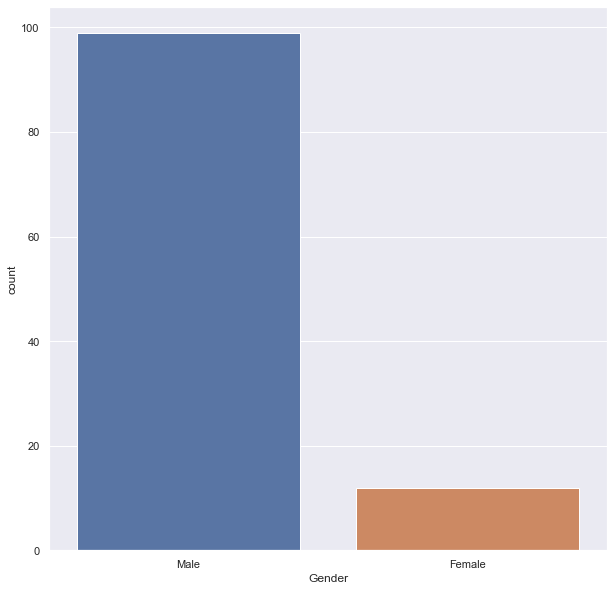

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1)
##finding which gender is most common in the course
sns.countplot(x='Gender',data=df)
plt.xticks()

## Which CGPA class do most students fit in.


(array([0, 1, 2, 3]),
 [Text(0, 0, '2.67 - 3.32'),
  Text(1, 0, '3.67 - 4.00'),
  Text(2, 0, '3.33 - 3.66'),
  Text(3, 0, '2.00 - 2.66')])

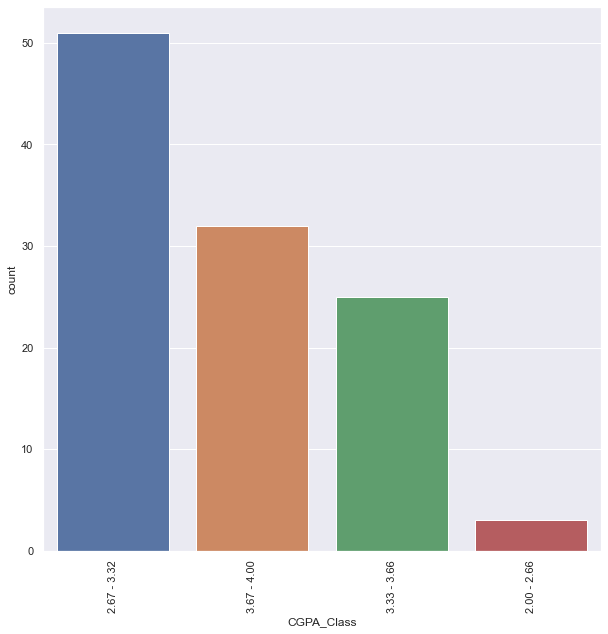

In [23]:
sns.countplot(x='CGPA_Class',
              data=df,
              order = df['CGPA_Class'].value_counts().index)
plt.xticks(rotation=90)

## Distribution plot to measure the quiz marks

Skewness: -1.016897
Kurtosis: 0.598104


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


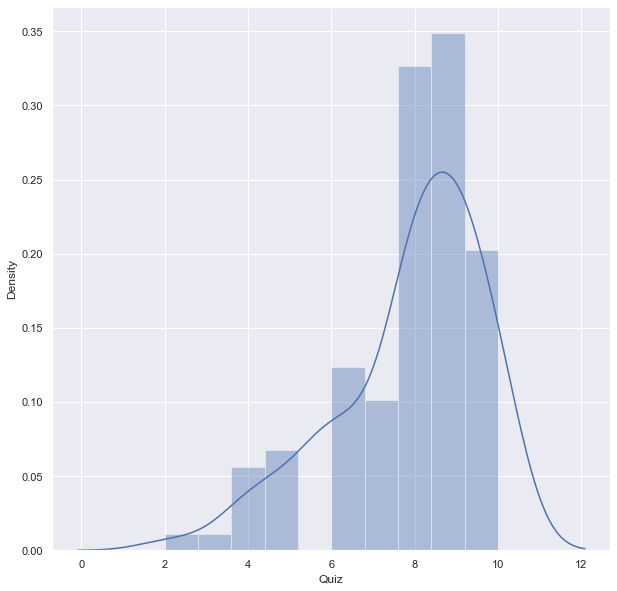

In [24]:
"""
sns.countplot(x='Quiz',
              data=df, 
              order=df['Quiz'].value_counts().index)
plt.xticks(rotation=90)
"""

sns.distplot(df['Quiz']);
#skewness and kurtosis
print("Skewness: %f" % df['Quiz'].skew())
print("Kurtosis: %f" % df['Quiz'].kurt())

## Student rating count for each 4 videos on Observer pattern


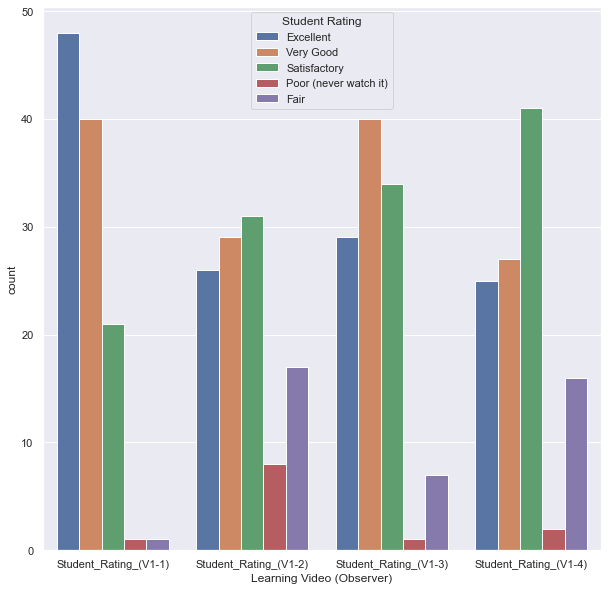

In [25]:
data1 = df[["Student_Rating_(V1-1)","Student_Rating_(V1-2)","Student_Rating_(V1-3)","Student_Rating_(V1-4)"]]
view = pd.DataFrame(data1)
df1 = view.melt(var_name='Learning Video (Observer)', value_name='Student Rating')
sns.countplot(x='Learning Video (Observer)', hue='Student Rating', data=df1)
plt.show()

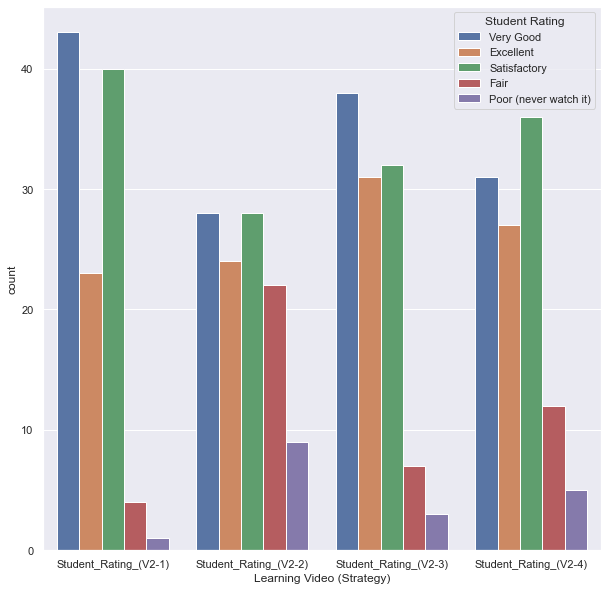

In [26]:
data1 = df[["Student_Rating_(V2-1)","Student_Rating_(V2-2)","Student_Rating_(V2-3)","Student_Rating_(V2-4)"]]
view = pd.DataFrame(data1)
df1 = view.melt(var_name='Learning Video (Strategy)', value_name='Student Rating')
sns.countplot(x='Learning Video (Strategy)', hue='Student Rating', data=df1)
plt.show()

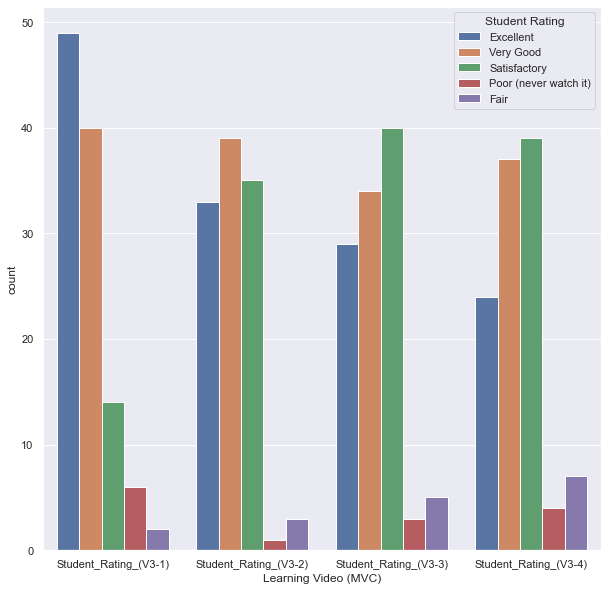

In [27]:
data1 = df[["Student_Rating_(V3-1)","Student_Rating_(V3-2)","Student_Rating_(V3-3)","Student_Rating_(V3-4)"]]
view = pd.DataFrame(data1)
df1 = view.melt(var_name='Learning Video (MVC)', value_name='Student Rating')
sns.countplot(x='Learning Video (MVC)', hue='Student Rating', data=df1)
plt.show()

## Which part of day have the students watch the videos for Observer design pattern

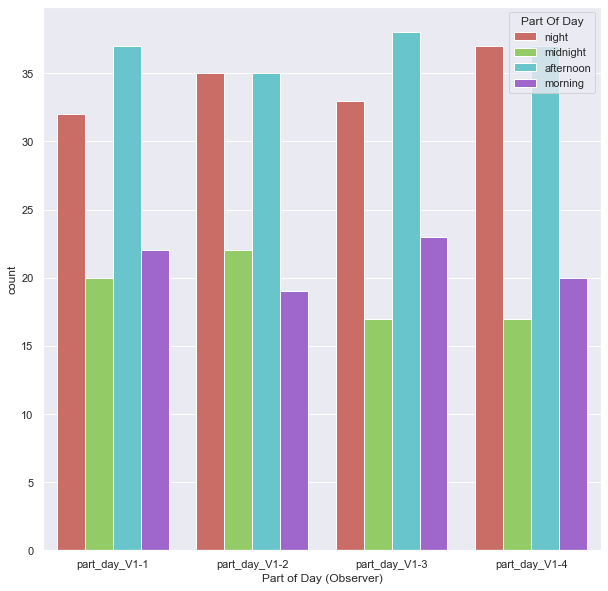

In [28]:
data = df[["part_day_V1-1","part_day_V1-2","part_day_V1-3","part_day_V1-4"]]
view = pd.DataFrame(data)
df1 = view.melt(var_name='Part of Day (Observer)', value_name='Part Of Day')
sns.countplot(x='Part of Day (Observer)', hue='Part Of Day',palette = 'hls', data=df1)
plt.show()

## Which part of day have the students watch the videos for Strategy design pattern

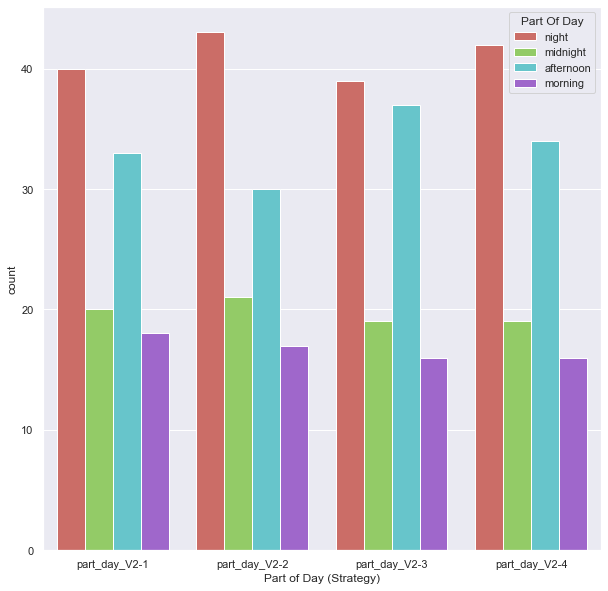

In [29]:
data = df[["part_day_V2-1","part_day_V2-2","part_day_V2-3","part_day_V2-4"]]
view = pd.DataFrame(data)
df1 = view.melt(var_name='Part of Day (Strategy)', value_name='Part Of Day')
sns.countplot(x='Part of Day (Strategy)', hue='Part Of Day',palette = 'hls', data=df1)
plt.show()

## Which part of day have the students watch the videos for MVC design pattern

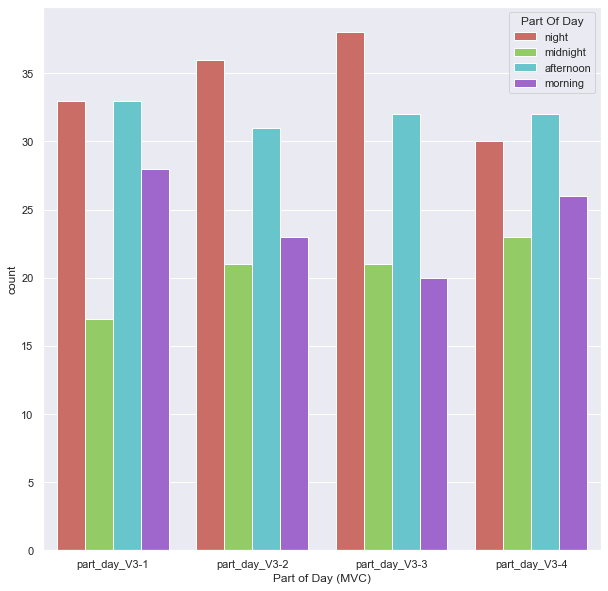

In [30]:
data = df[["part_day_V3-1","part_day_V3-2","part_day_V3-3","part_day_V3-4"]]
view = pd.DataFrame(data)
df1 = view.melt(var_name='Part of Day (MVC)', value_name='Part Of Day')
sns.countplot(x='Part of Day (MVC)', hue='Part Of Day',palette = 'hls', data=df1)
plt.show()

## Grouping behavioral design pattern data by student learning styles

In [31]:
active = df.groupby('Active').get_group(1)
reflective = df.groupby('Reflective').get_group(1)
Sensing = df.groupby('Sensing').get_group(1)
Intuitive = df.groupby('Intuitive').get_group(1)
Visual = df.groupby('Visual').get_group(1)
Verbal = df.groupby('Verbal').get_group(1)
Sequential = df.groupby('Sequential').get_group(1)
globaal = df.groupby('Global').get_group(1)

## Counting total number of occurrences of students 8 learning styles in the experiment

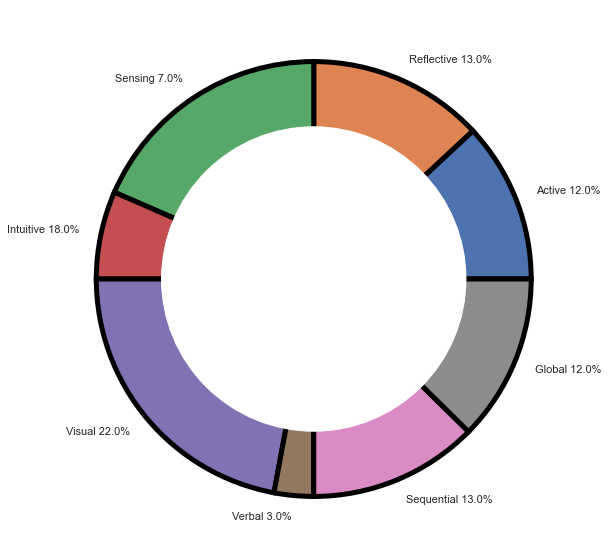

In [32]:
# create data
size_of_groups=[active['CGPA_Class'].count(),
                reflective['CGPA_Class'].count(),
                Sensing['CGPA_Class'].count(),
                Intuitive['CGPA_Class'].count(),
                Visual['CGPA_Class'].count(),
                Verbal['CGPA_Class'].count(),
                Sequential['CGPA_Class'].count(),
                globaal['CGPA_Class'].count()]

Sum = sum(size_of_groups)
p = []
for i in range(0,8):
    pct = (size_of_groups[i] / Sum) * 100
    p.append(round(pct,0))


# Create a pieplot
names = ['Active ' + str(p[0])+ "%",
         'Reflective ' + str(p[1])+ "%",
         'Sensing ' + str(p[3]) + "%",
         'Intuitive '+ str(p[2]) + "%",
         'Visual ' + str(p[4]) + "%",
         'Verbal ' + str(p[5]) + "%",
         'Sequential ' + str(p[6]) + "%",
         'Global ' + str(p[7]) + "%"
        ]
plt.pie(size_of_groups, labels = names, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'black' } )

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [33]:
df.columns

Index(['CGPA_Class', 'Gender', 'V1-1_(1)', 'Time_Day_Watched_(V1-1)',
       'Student_Rating_(V1-1)', 'V1-2_(1)', 'Time_Day_Watched_(V1-2)',
       'Student_Rating_(V1-2)', 'V1-3_(1)', 'Time_Day_Watched_(V1-3)',
       'Student_Rating_(V1-3)', 'V1-4_(1)', 'Time_Day_Watched_(V1-4)',
       'Student_Rating_(V1-4)', 'Overall_Rating_V1', 'Watch_Status_V1',
       'V1_PercentWatched', 'V2-1_(2)', 'Time_Day_Watched_(V2-1)',
       'Student_Rating_(V2-1)', 'V2-2_(2)', 'Time_Day_Watched_(V2-2)',
       'Student_Rating_(V2-2)', 'V2-3_(2)', 'Time_Day_Watched_(V2-3)',
       'Student_Rating_(V2-3)', 'V2-4_(2)', 'Time_Day_Watched_(V2-4)',
       'Student_Rating_(V2-4)', 'Overall_Rating_V2', 'Watch_Status_V2',
       'V2_PercentWatched', 'V3-1_(3)', 'Time_Day_Watched_(V3-1)',
       'Student_Rating_(V3-1)', 'V3-2_(3)', 'Time_Day_Watched_(V3-2)',
       'Student_Rating_(V3-2)', 'V3-3_(3)', 'Time_Day_Watched_(V3-3)',
       'Student_Rating_(V3-3)', 'V3-4_(3)', 'Time_Day_Watched_(V3-4)',
       'Stude

## Assigning target features to a new dataset for further analysis

In [34]:
features = df[["CGPA_Class",
             "Overall_Rating_V1",
             "Overall_Rating_V2",
             "Overall_Rating_V3",
             "Watch_Status_V1",
             "Watch_Status_V2",
             "Watch_Status_V3",
             "A/R_Score",
             "S/I_Score",
             "Vi/Vb_Score",
             "S/G_Score",
             "Quiz",
             "Active",
             "Reflective",
             "Sensing",
             "Intuitive",
             "Visual",
             "Verbal",
             "Sequential",
             "Global"]]
features

,CGPA_Class,Overall_Rating_V1,Overall_Rating_V2,Overall_Rating_V3,Watch_Status_V1,Watch_Status_V2,Watch_Status_V3,A/R_Score,S/I_Score,Vi/Vb_Score,S/G_Score,Quiz,Active,Reflective,Sensing,Intuitive,Visual,Verbal,Sequential,Global
0,2.67 - 3.32,Very Good,Very Good,Very Good,Completed,Completed,Completed,3,3,7,1,10,1,0,1,0,1,0,1,0
1,2.67 - 3.32,Very Good,Very Good,Very Good,Completed,Completed,Rewatched,3,9,7,3,8,0,1,1,0,1,0,0,1
2,2.67 - 3.32,Very Good,Very Good,Very Good,Completed,Completed,Completed,1,7,7,3,6,0,1,1,0,1,0,0,1
3,3.67 - 4.00,Excellent,Excellent,Excellent,Completed,Rewatched,Completed,3,3,7,1,5,0,1,1,0,1,0,1,0
4,2.67 - 3.32,Very Good,Very Good,Very Good,Completed,Completed,Completed,3,1,5,3,8,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2.67 - 3.32,Satisfactory,Fair,Fair,Didnt Watch,Didnt Watch,Didnt Watch,1,5,3,5,10,1,0,1,0,1,0,0,1
109,3.33 - 3.66,Satisfactory,Satisfactory,Very Good,Didnt Watch,Half Watched,Rewatched,3,5,9,1,9,1,0,1,0,1,0,0,1
110,3.67 - 4.00,Satisfactory,Satisfactory,Very Good,Completed,Completed,Rewatched,5,1,7,3,9,1,0,0,1,1,0,0,1
111,3.67 - 4.00,Very Good,Very Good,Very Good,Rewatched,Rewatched,Rewatched,3,1,3,3,10,1,0,1,0,0,1,1,0


# Gathering categorical insights based on the target features
# *Active / Reflective learners (Active 1 / Reflective 0)

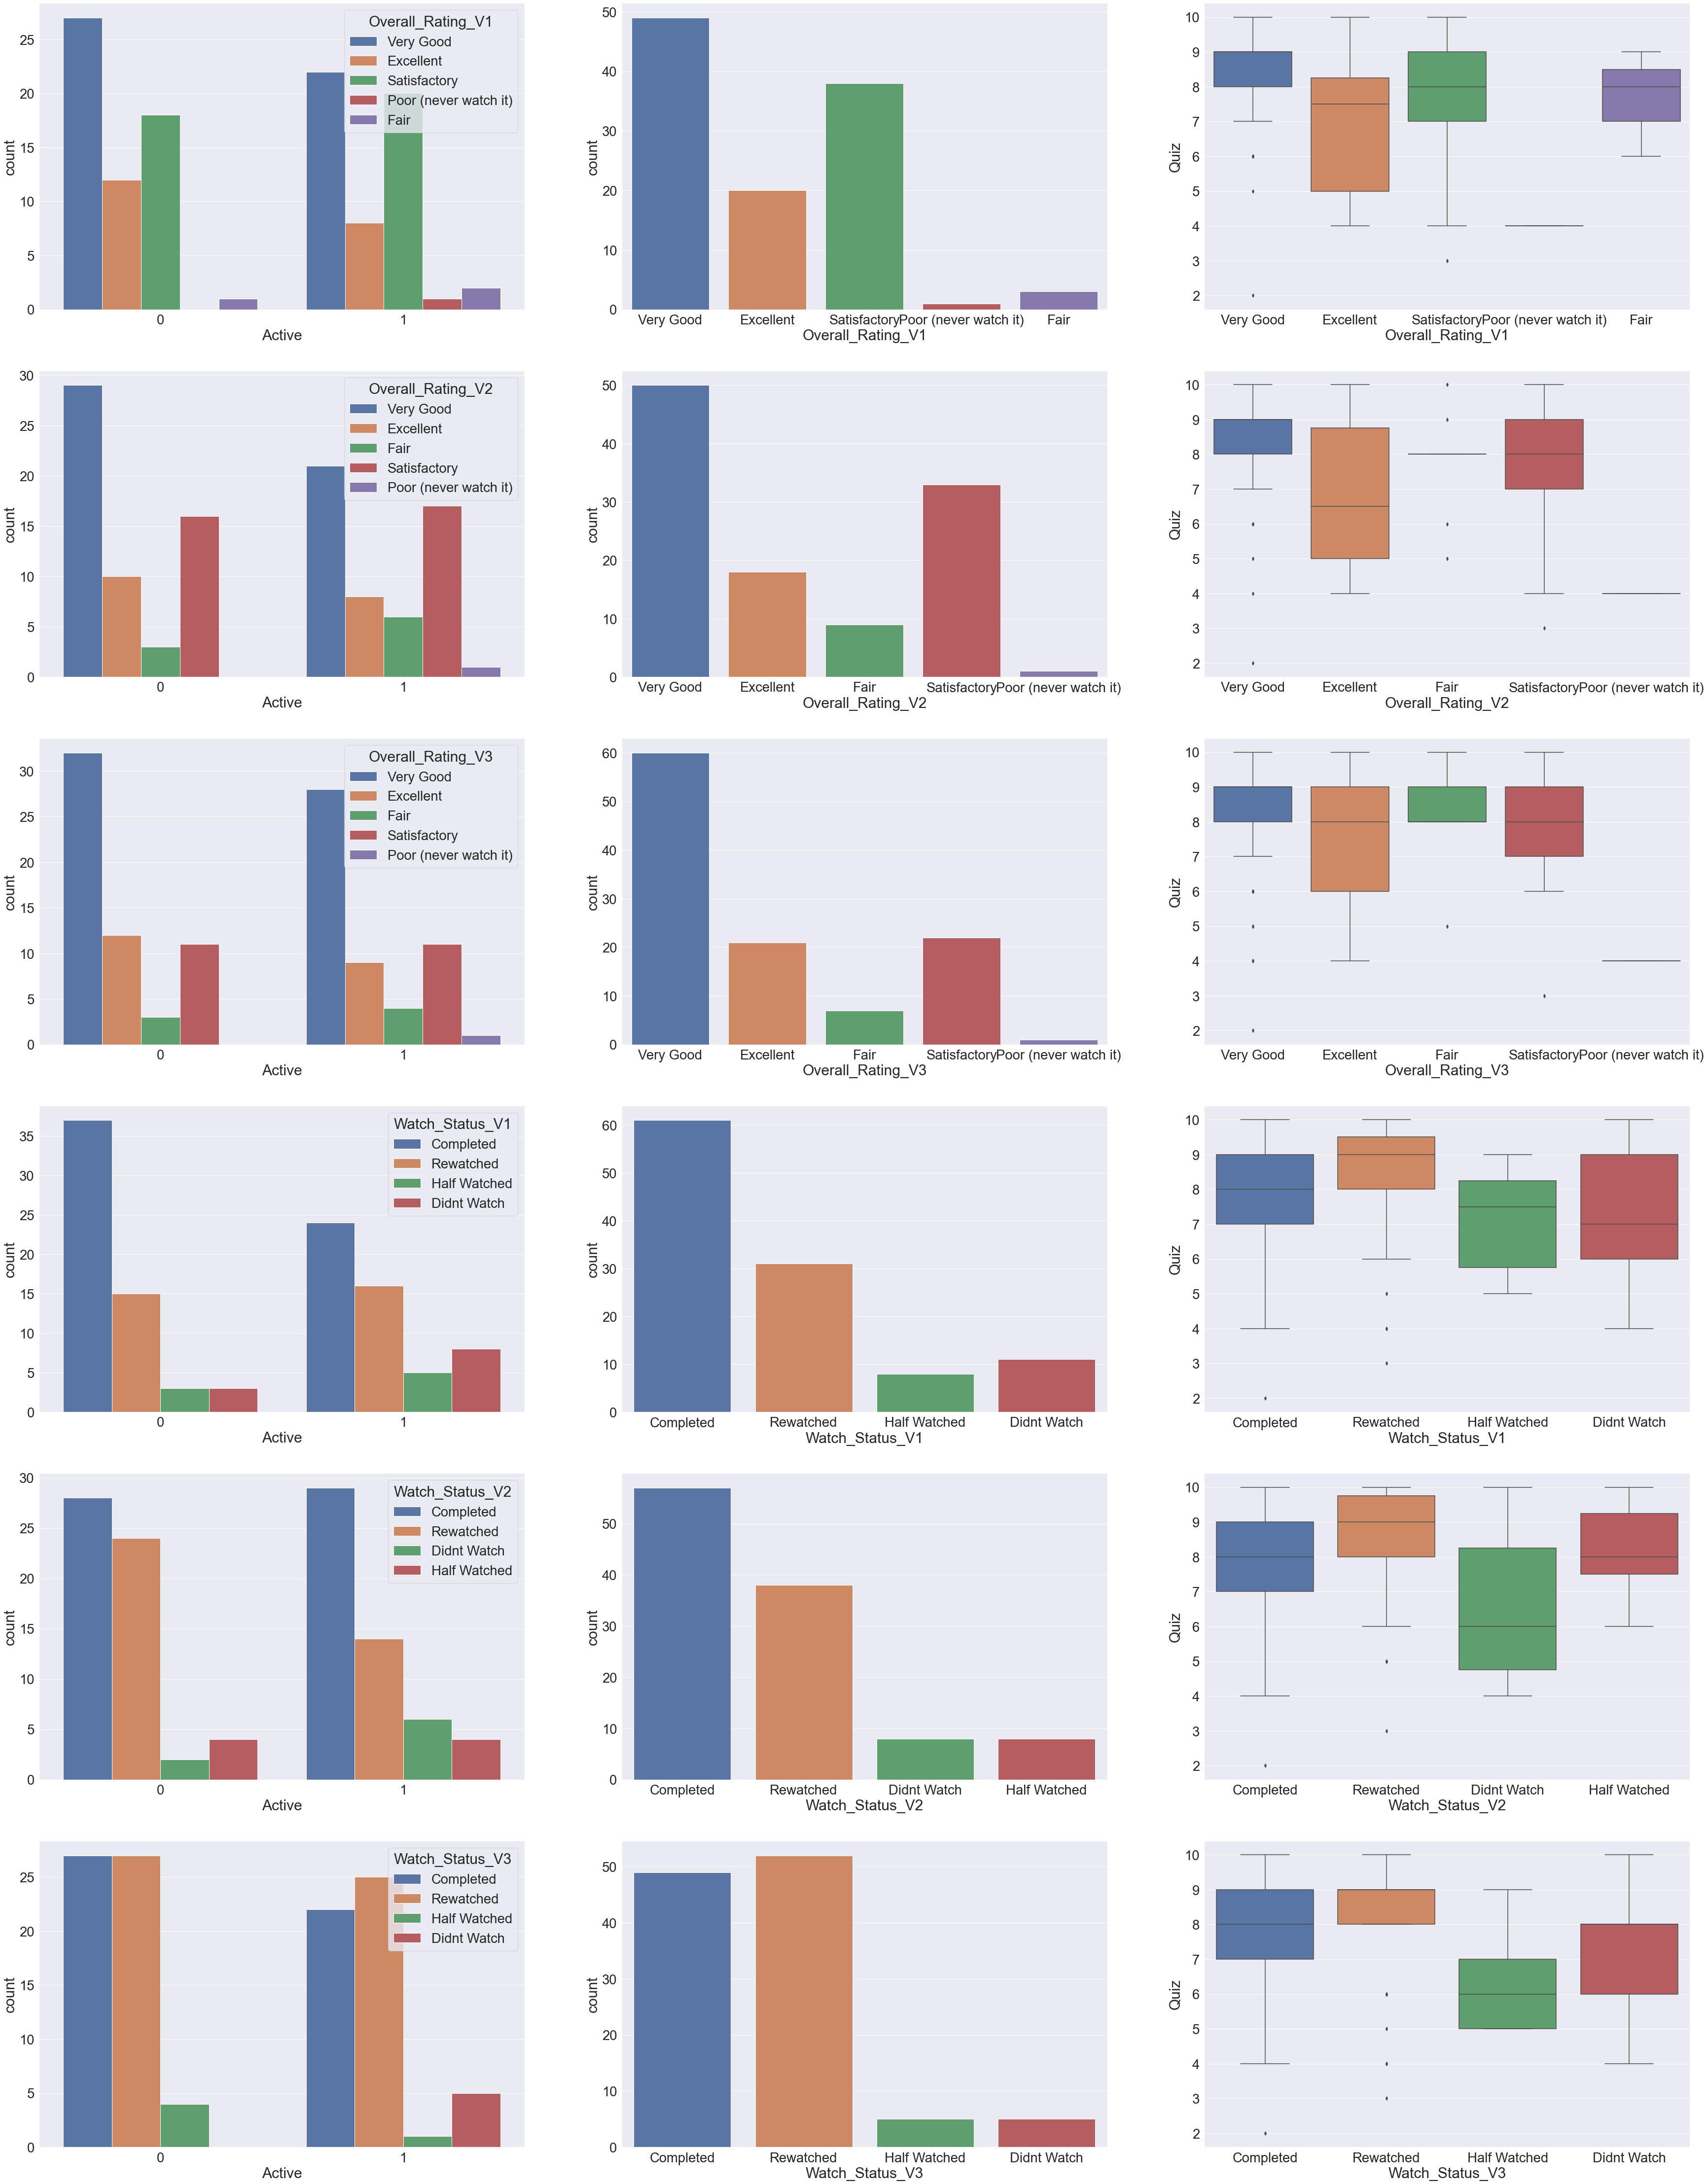

In [35]:
sns.set(font_scale = 2.5)
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60, 80))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=features,
                      x='Active', hue=column, ax=ax[0])

        sns.countplot(data=features, x=column, ax=ax[1])

        sns.boxplot(data=features, x=column,
                    y='Quiz', ax=ax[2])
        
#columns = targets.select_dtypes(include=['object'])
columns = features
columns = columns.drop(["A/R_Score","CGPA_Class","S/I_Score","Vi/Vb_Score","S/G_Score","Quiz","Active","Reflective","Sensing","Intuitive","Visual","Verbal","Sequential","Global"], axis = 1)
plot_categorical_insight(columns)        

# *Sensing / Intuitive learners (Sensing 1 / Intuitive 0)

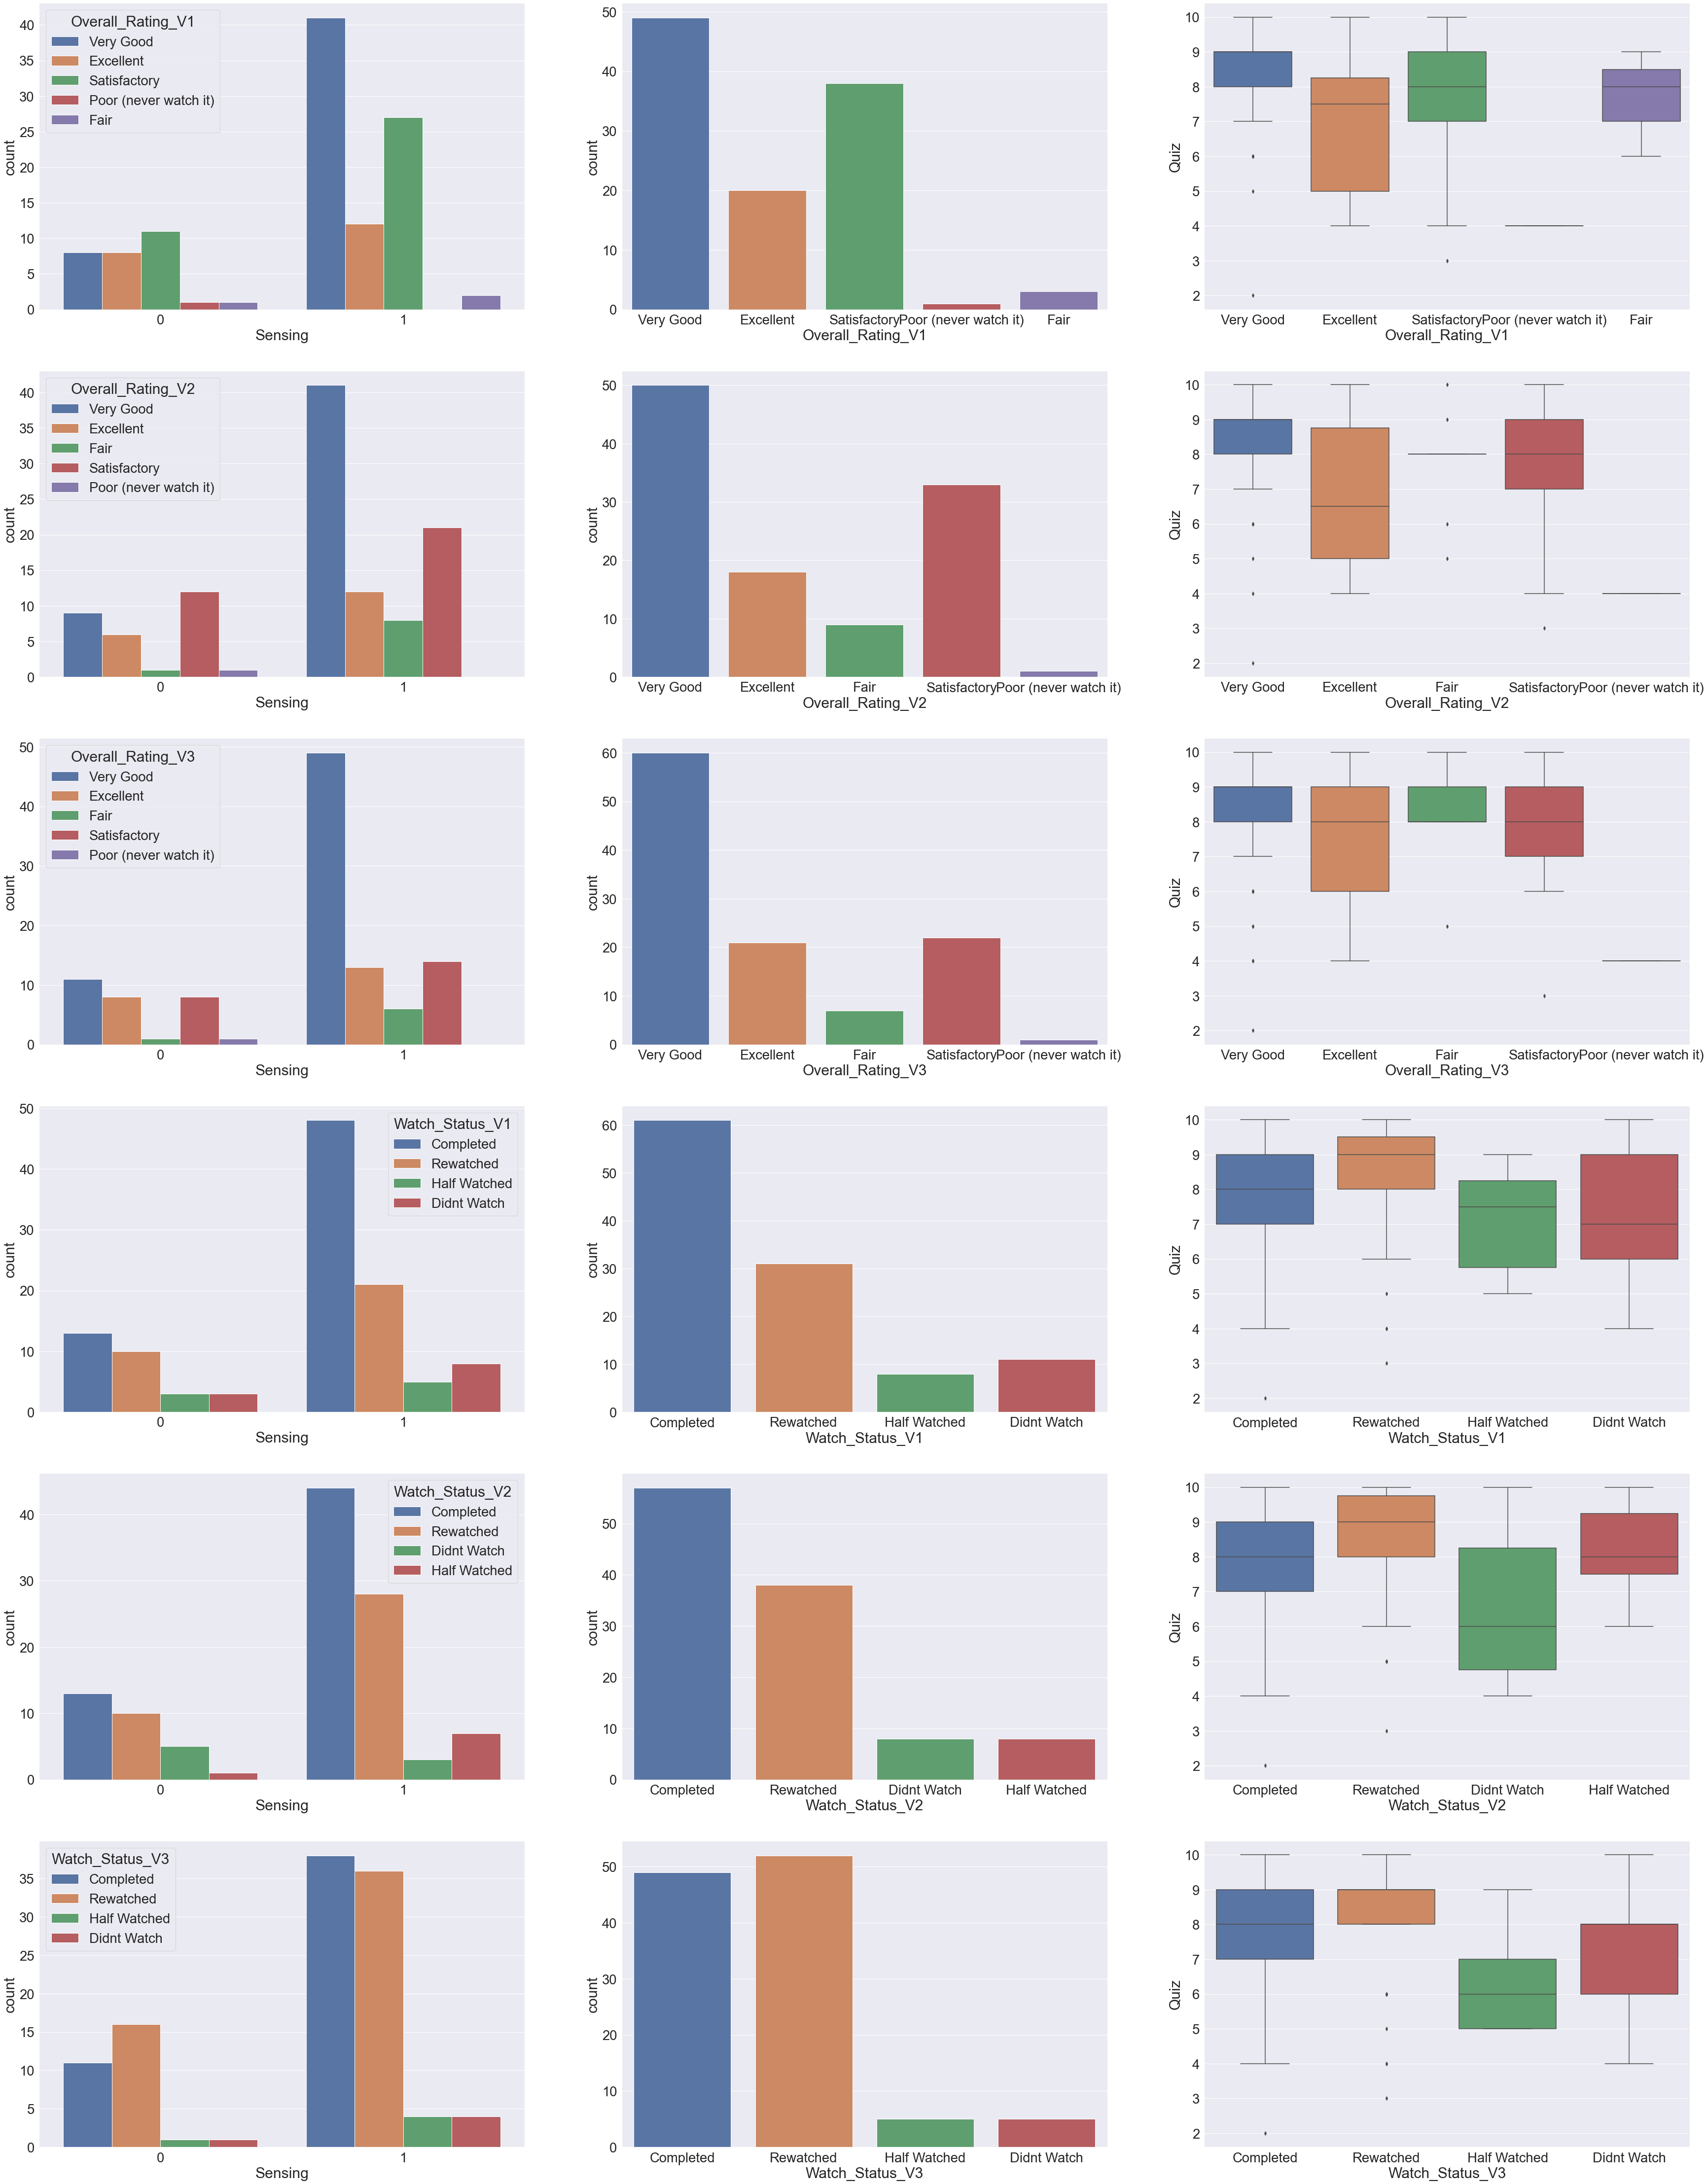

In [36]:
sns.set(font_scale = 2.5)
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60, 80))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=features,
                      x='Sensing', hue=column, ax=ax[0])

        sns.countplot(data=features, x=column, ax=ax[1])

        sns.boxplot(data=features, x=column,
                    y='Quiz', ax=ax[2])
        
#columns = targets.select_dtypes(include=['object'])
columns = features
columns = columns.drop(["A/R_Score","CGPA_Class","S/I_Score","Vi/Vb_Score","S/G_Score","Quiz","Active","Reflective","Sensing","Intuitive","Visual","Verbal","Sequential","Global"], axis = 1)
plot_categorical_insight(columns)        

# *Visual / Verbal learners  (Visual 1 / Verbal 0)

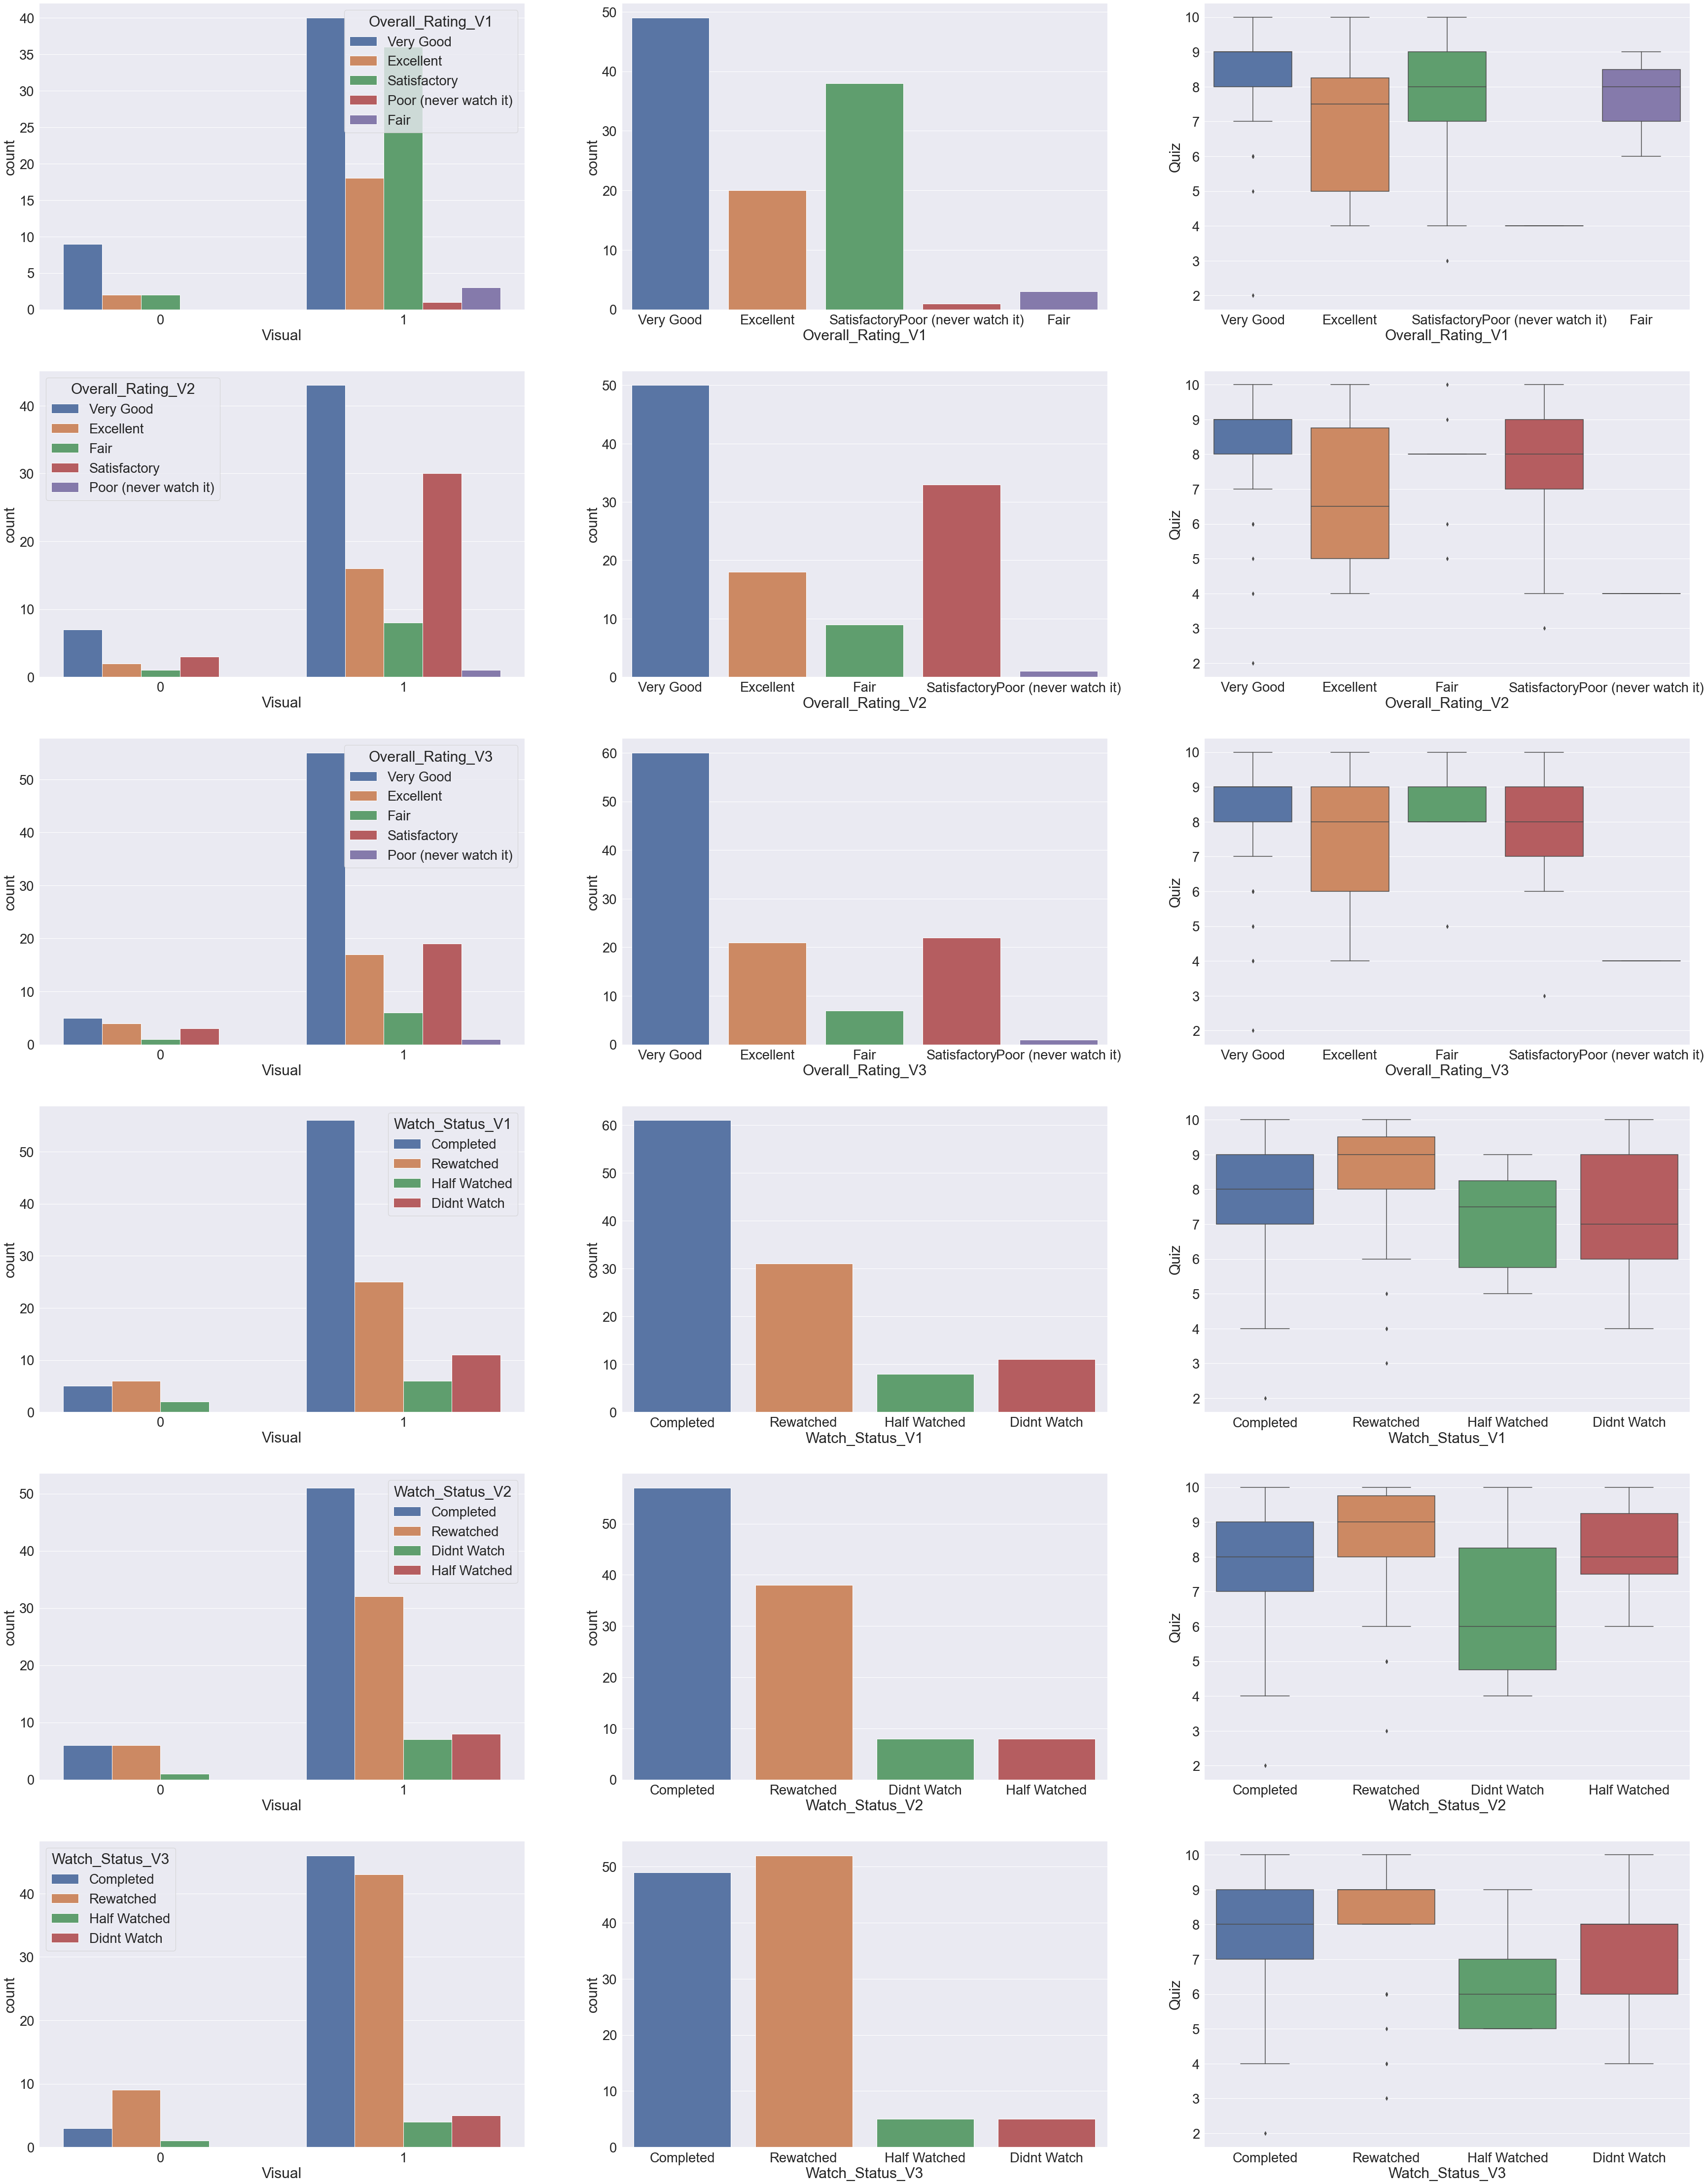

In [37]:
sns.set(font_scale = 2.5)
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60, 80))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=features,
                      x='Visual', hue=column, ax=ax[0])

        sns.countplot(data=features, x=column, ax=ax[1])

        sns.boxplot(data=features, x=column,
                    y='Quiz', ax=ax[2])
        
#columns = targets.select_dtypes(include=['object'])
columns = features
columns = columns.drop(["A/R_Score","CGPA_Class","S/I_Score","Vi/Vb_Score","S/G_Score","Quiz","Active","Reflective","Sensing","Intuitive","Visual","Verbal","Sequential","Global"], axis = 1)
plot_categorical_insight(columns)        

# *Sequential / Global learners  (Sequential 1 / Global 0)

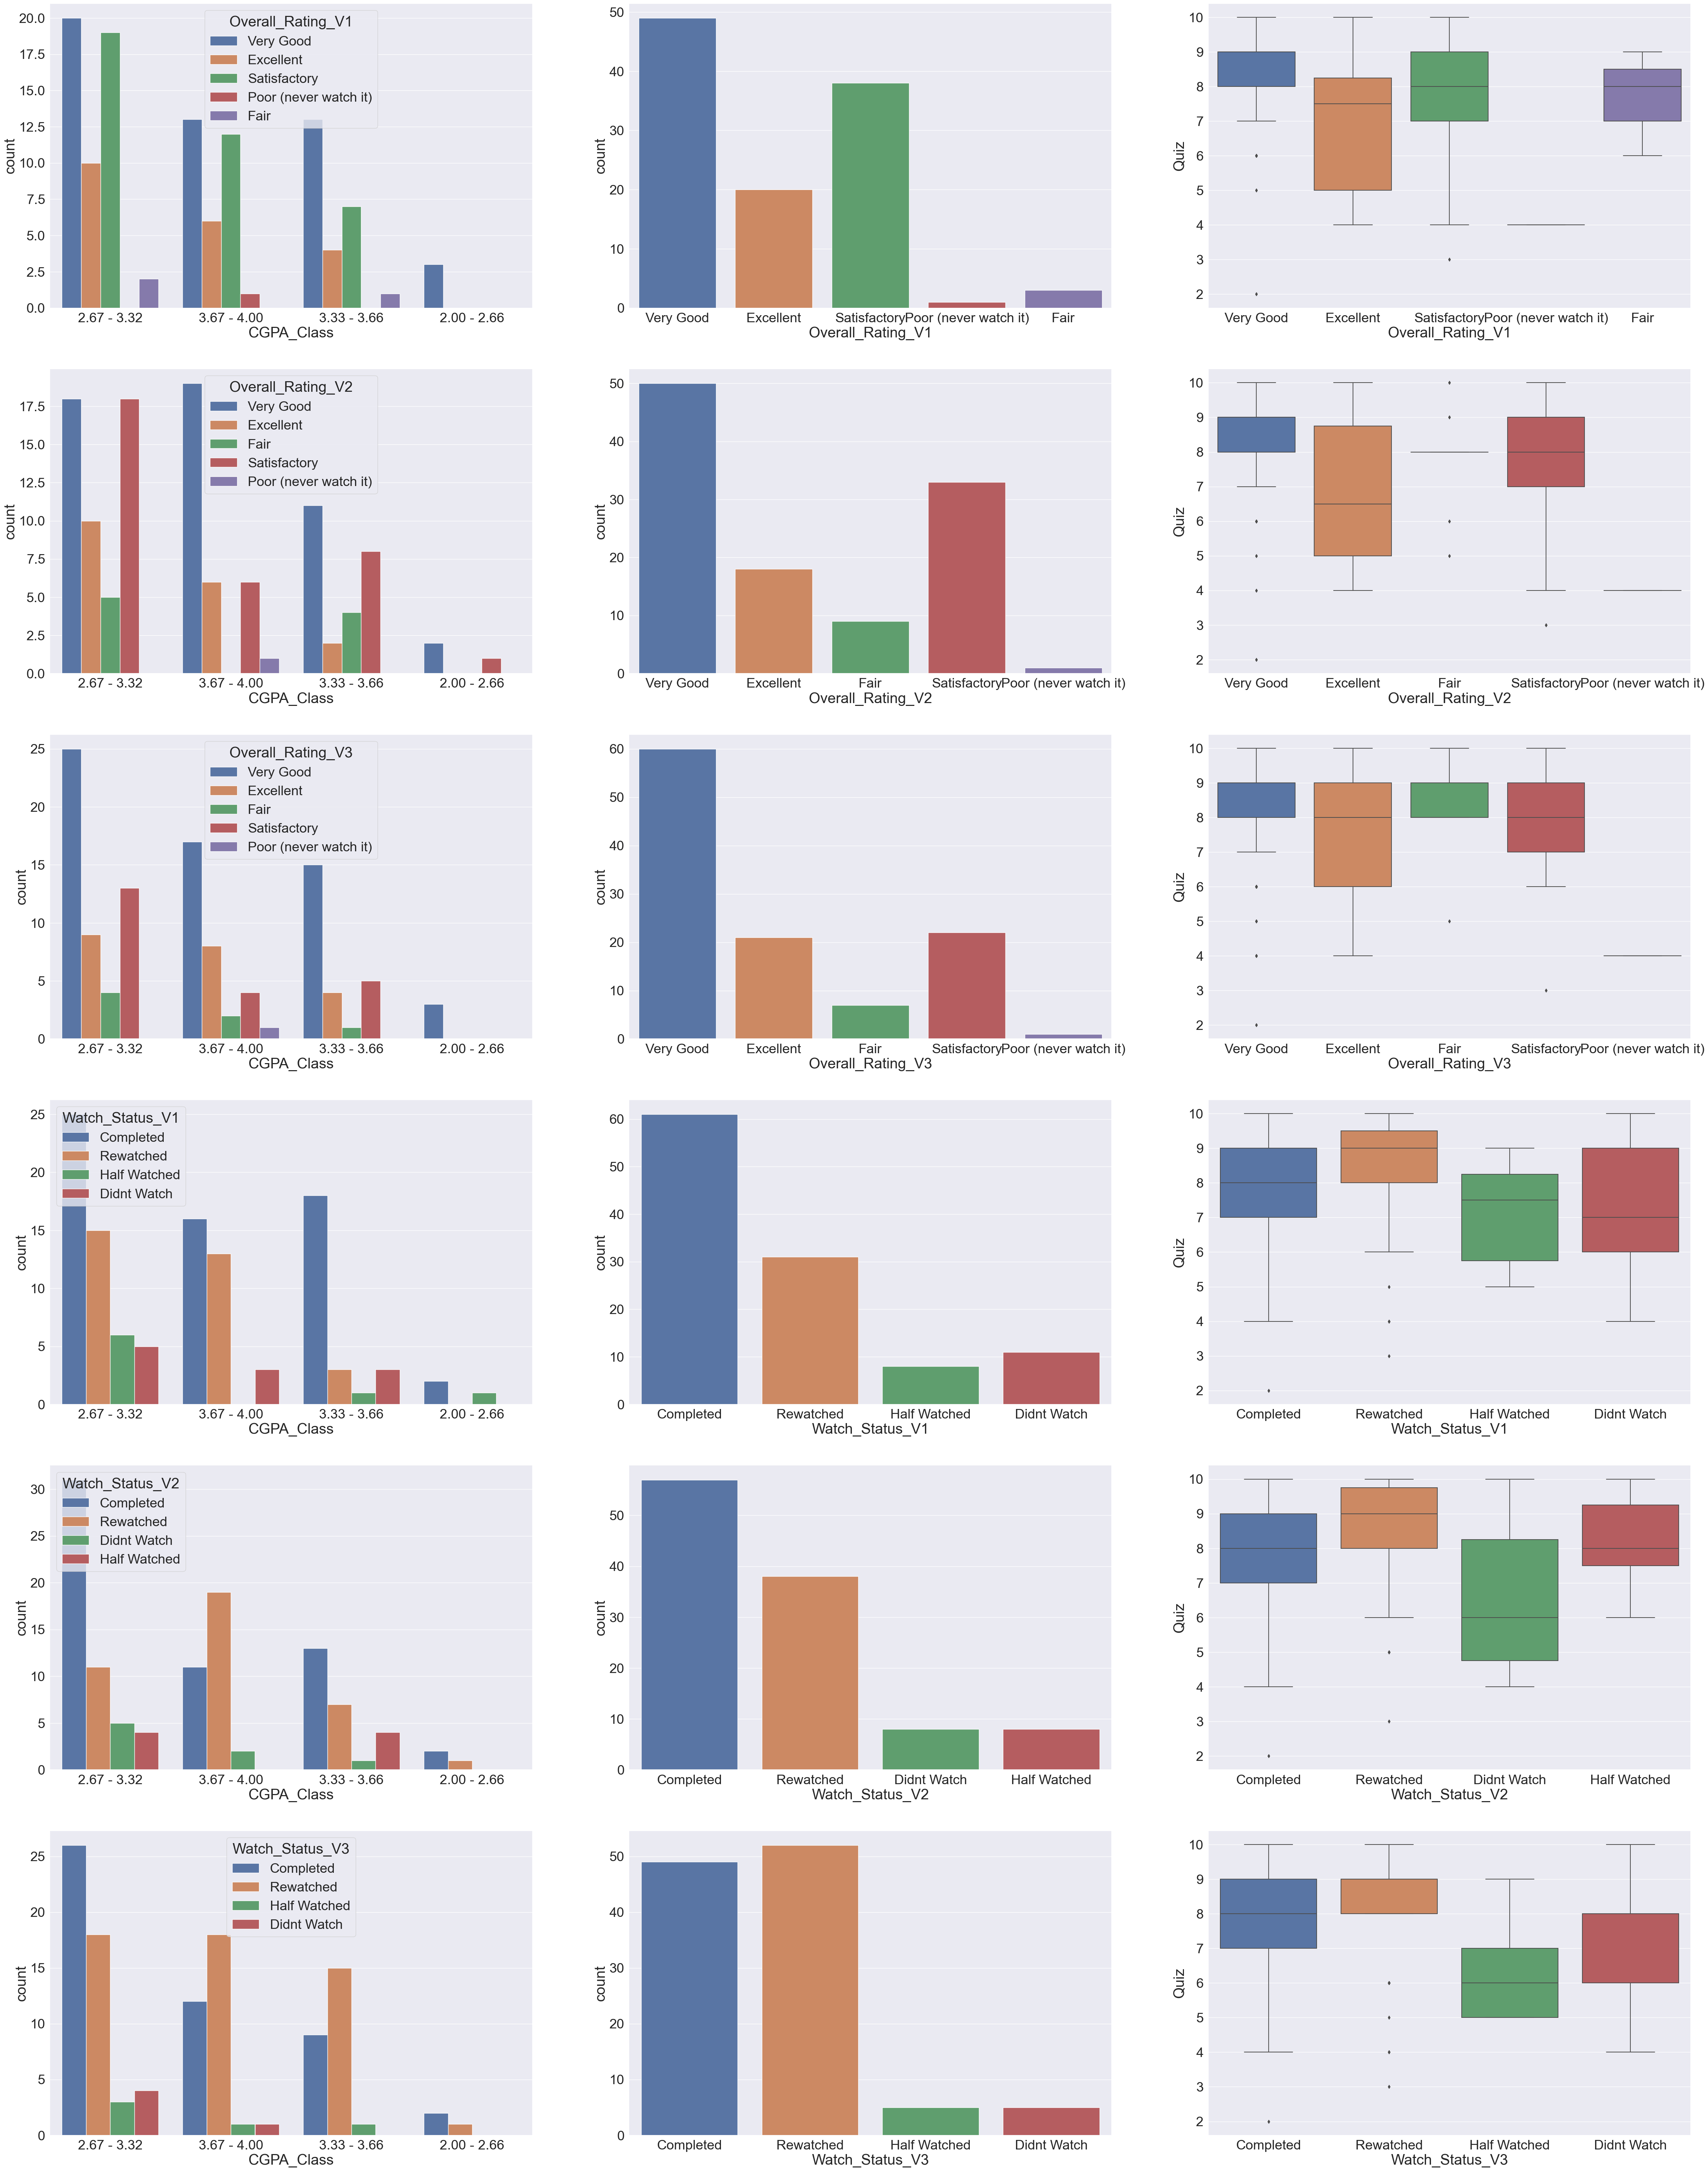

In [41]:
sns.set(font_scale = 2.5)
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60, 80))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=features,
                      x='CGPA_Class', hue=column, ax=ax[0])

        sns.countplot(data=features, x=column, ax=ax[1])

        sns.boxplot(data=features, x=column,
                    y='Quiz', ax=ax[2])
        
#columns = targets.select_dtypes(include=['object'])
columns = features
columns = columns.drop(["A/R_Score","CGPA_Class","S/I_Score","Vi/Vb_Score","S/G_Score","Quiz","Active","Reflective","Sensing","Intuitive","Visual","Verbal","Sequential","Global"], axis = 1)
plot_categorical_insight(columns)        

In [39]:
analyze_report = sv.analyze(features)
analyze_report.show_html('Corellation.html', open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report Corellation.html was generated.


## Exporting cleaned dataset to external csv file for predictive modelling

In [40]:
df.to_csv('BDP_Cleaned.csv', index=False)